**Omkar Korade**

**Abhijeet Thorat**

**AML Assignment Question Number 1 **

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Question A
df = pd.read_csv('happiness_data.csv')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


The dataset consists of 1949 data entries and 11 attributes/features.

The dataset consists of several features describing various aspects of well-being and socio-economic factors for different years in different countries.

Time Span: The dataset covers the years from 2005 to 2020.
Number of Data Points: The data counts range from 1839 to 1949 across different features.

Features: The dataset includes a mix of continuous-valued features, which represent measurements related to happiness, health, economy, and perceptions. Key features include:

1. Country
2. Year
3. Life ladder
4. Log GDP per capita
5. Social Support
6. Healthy Life expectancy at birth
7. Freedom to make life choices
8. Generosity
9. Perceptions of corruption
10. Positive affect
11. Negative affect

9 of the 11 attributes are continuous valued:

1.   Life ladder
2.   Log GDP per capita
3. Social Support
4. Healthy Life expectancy at birth
3.  Freedom to make life choices
4. Generosity
5. Perceptions of corruption
6. Positive affect
7. Negative affect

The only categorical attribute is Country.

PS: Since, year is ignored it is neither considered continuous nor categorical.

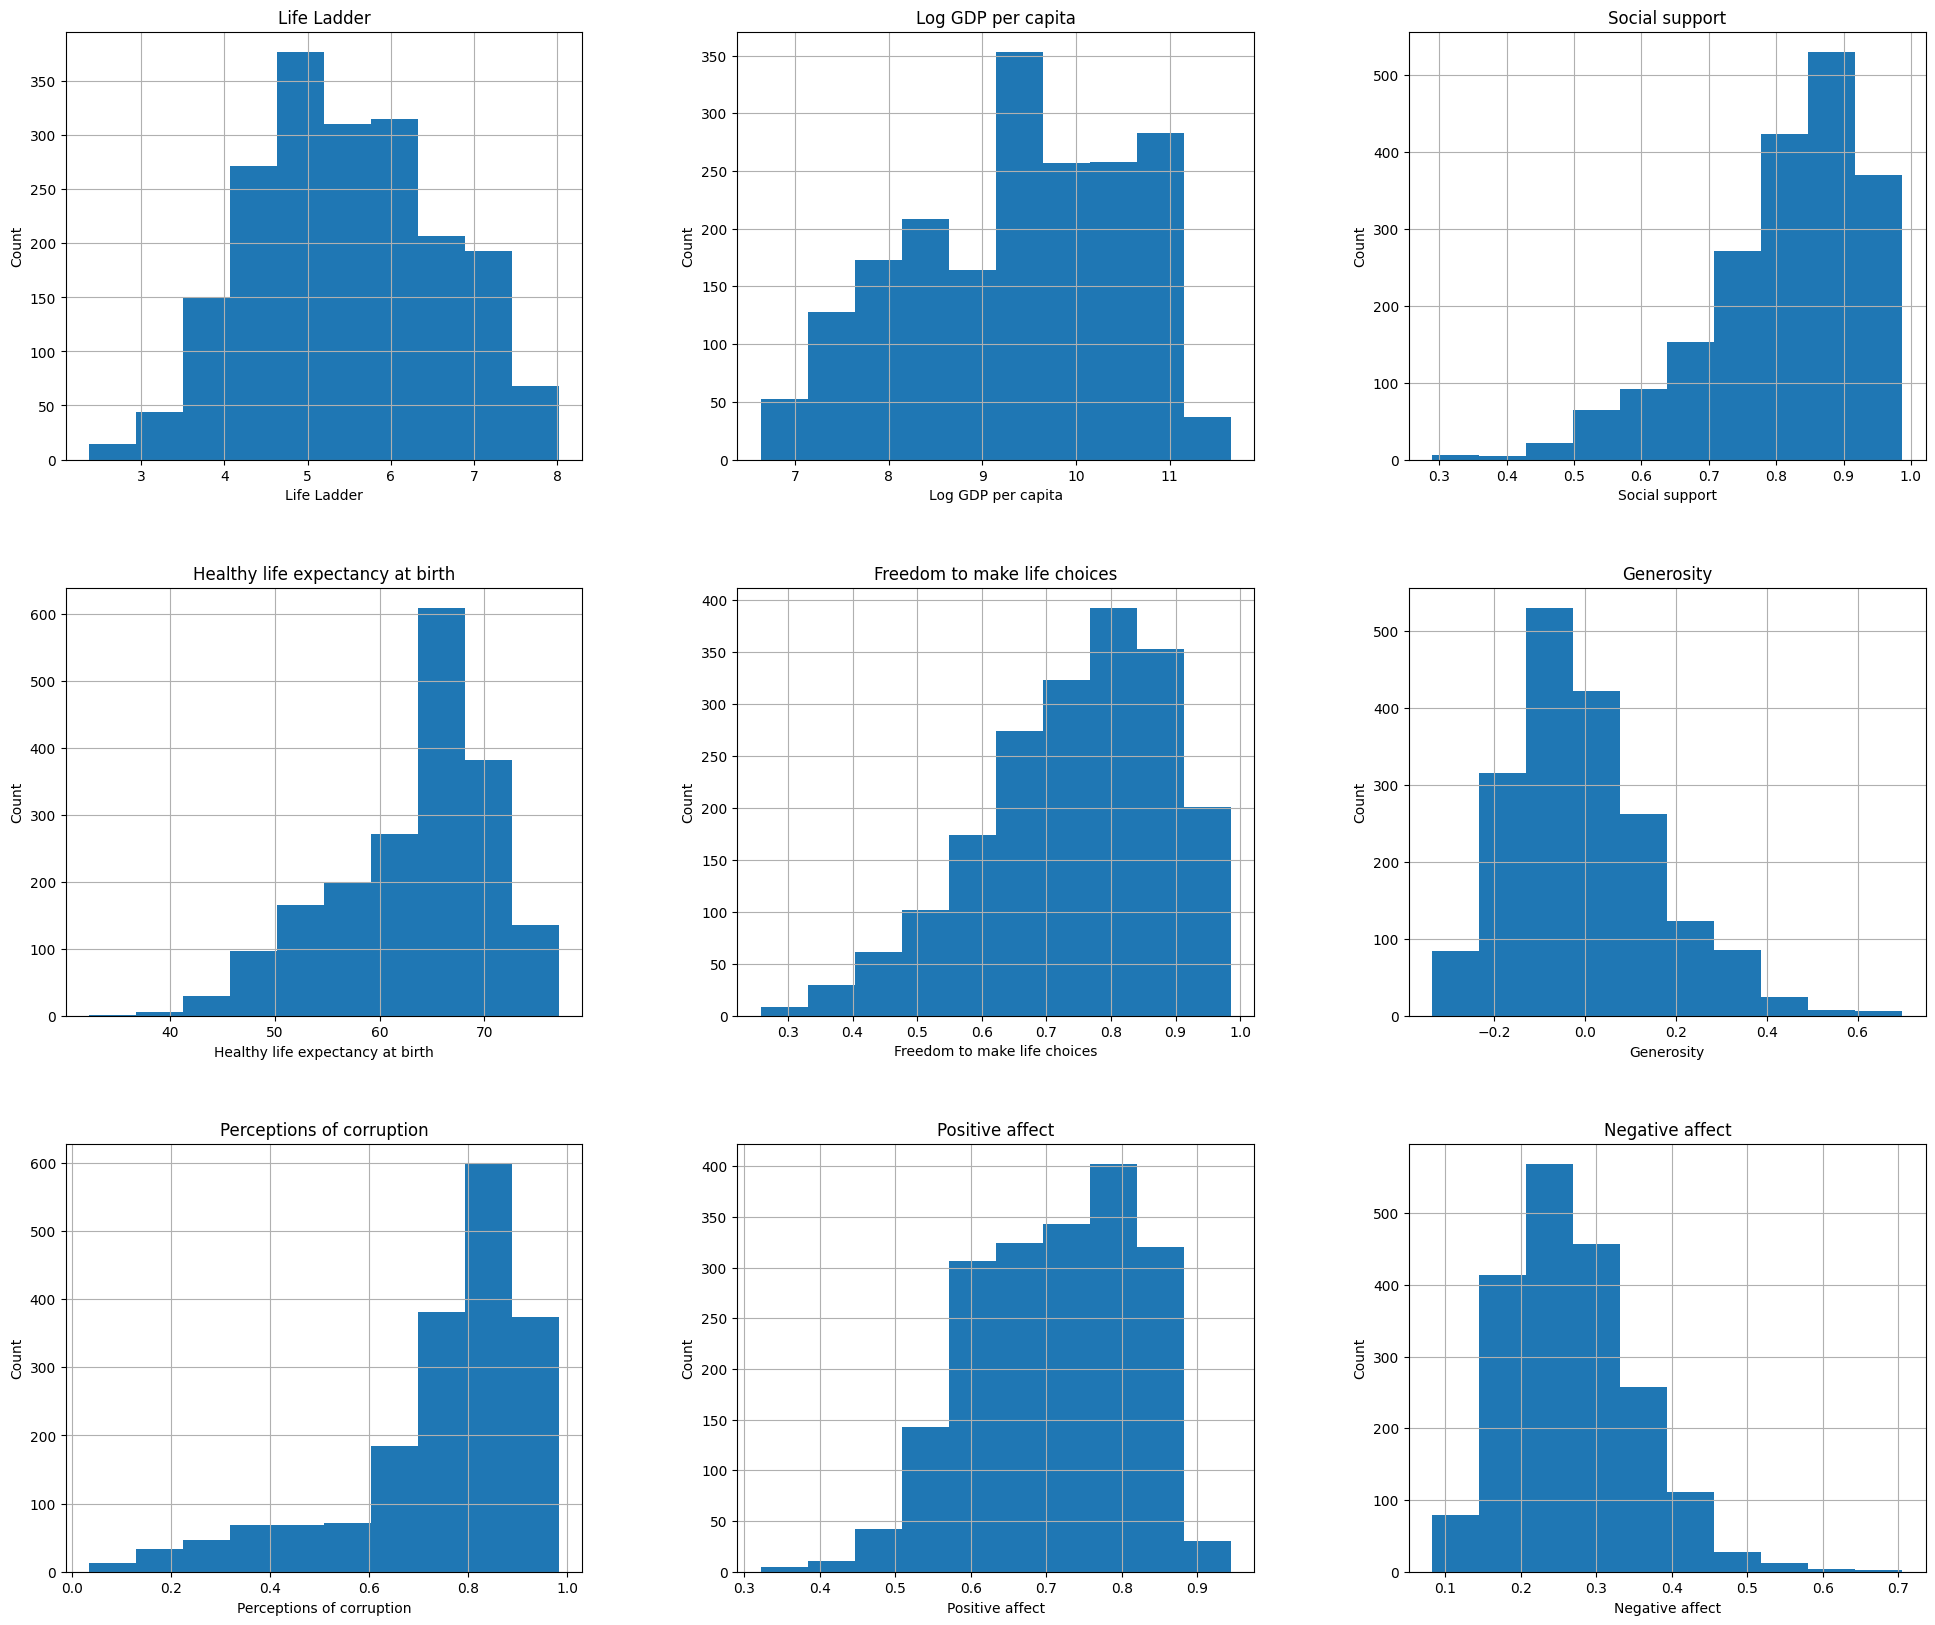

In [ ]:
# Question B
df1 = df.drop(['Country name', 'year'], axis=1, inplace=False)
df1.head()

axes = df1.hist(figsize=(24,20), xlabelsize = 10, ylabelsize=10)

for ax, column in zip(axes.flatten(), df1.columns):
  ax.set_xlabel(column)
  ax.set_ylabel('Count')

plt.show()

In [ ]:
''' Question B Statistical values
Display the statistical values for each of the attributes, along with visualizations(e.g., histogram) of the distributions for each attribute.
Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?'''

rangedf = df.describe()
rangedf

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


Notable Traits:

1. Generosity: The mean is almost zero, with a negative range, which suggests the possibility of outliers or highly skewed data.

2. Perceptions of corruption: There is a wide range of values, indicating substantial variance in how countries perceive corruption.

3. Healthy life expectancy at birth: A broad range from 32 to 77 years shows significant disparities in health across countries.

Special treatment

1. Generosity: With values ranging from negative to positive, this feature may require special treatment like normalization or scaling to handle outliers and improve model performance.

2. Missing Values: Several features, such as Log GDP per capita, Social support, and Healthy life expectancy at birth, have missing values. These could be either dropped or could be handled using imputation techniques (e.g., mean/mode filling or more advanced methods like KNN imputation).

In [ ]:
navalues = df1.isna().sum()
navalues

,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22
Negative affect,16


In [ ]:
df1.dropna(inplace=True)
df1.isna().sum()

,0
Life Ladder,0
Log GDP per capita,0
Social support,0
Healthy life expectancy at birth,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Positive affect,0
Negative affect,0


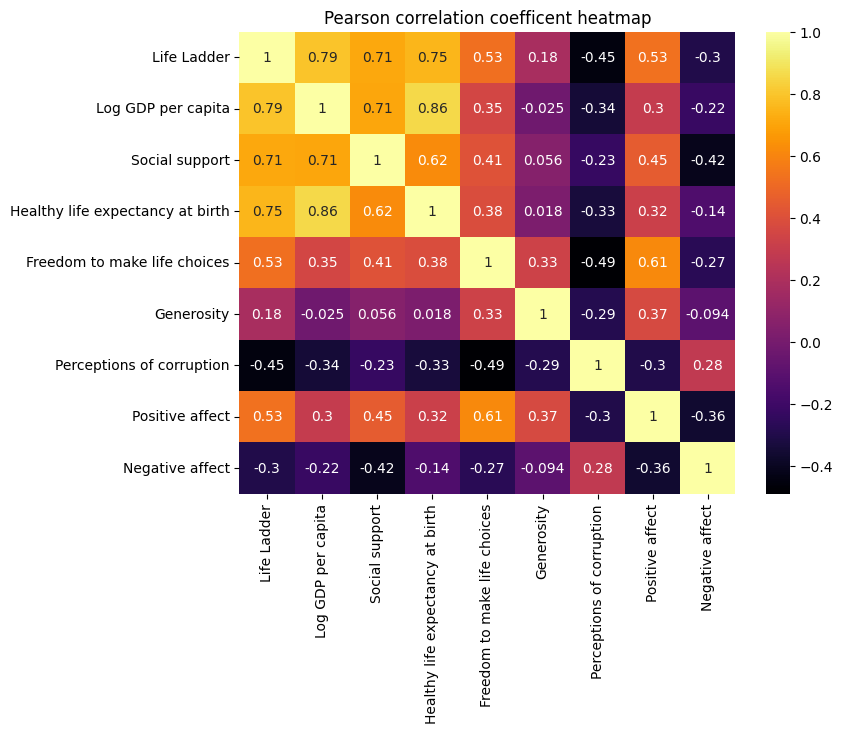

In [ ]:
'''Question C
Analyze the relationships between the data attributes, and between the data attributes and label.
This involves computing the Pearson Correlation Coefficient(PCC) and generating scatter plots.'''

import seaborn as sns

heatmap = df1.corr()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap, annot=True, cmap='inferno')
plt.title('Pearson correlation coefficent heatmap')
plt.xticks(rotation=90)
plt.show()

Correlation between Life Ladder and Log GDP per capita: 0.79


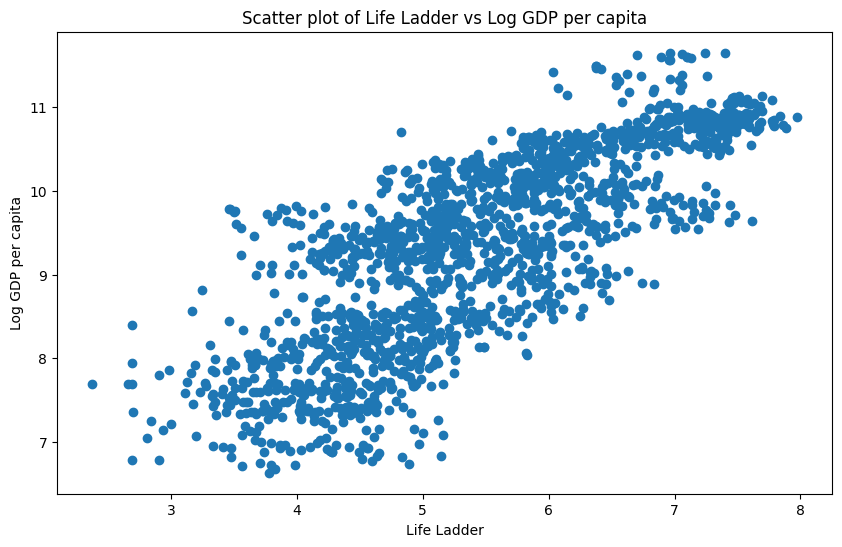

Correlation between Life Ladder and Social support: 0.71


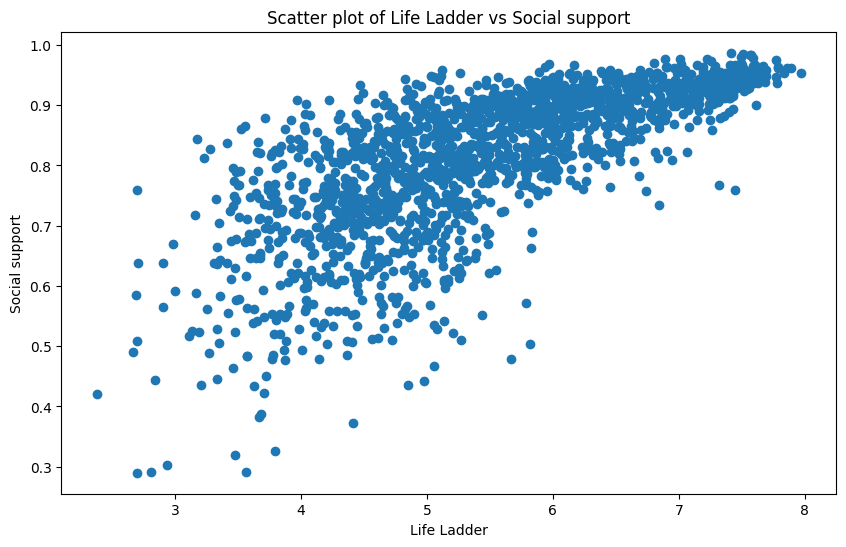

Correlation between Life Ladder and Healthy life expectancy at birth: 0.75


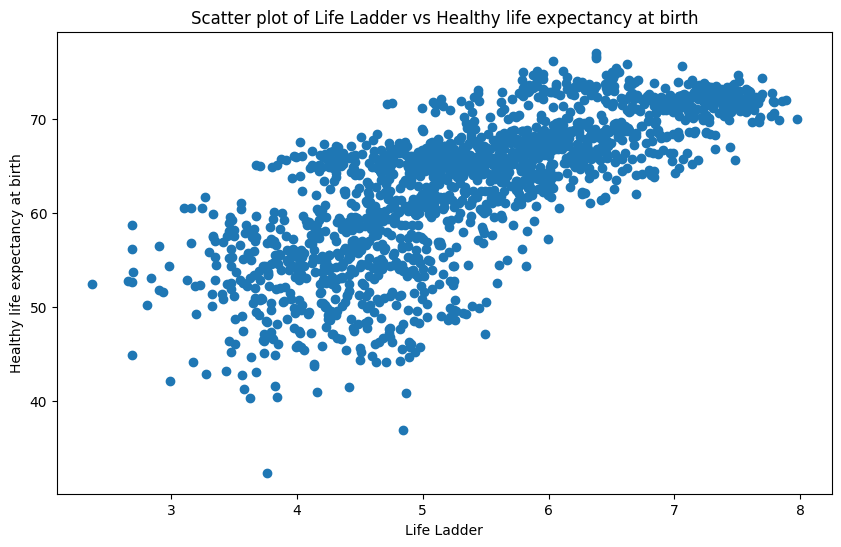

Correlation between Life Ladder and Freedom to make life choices: 0.53


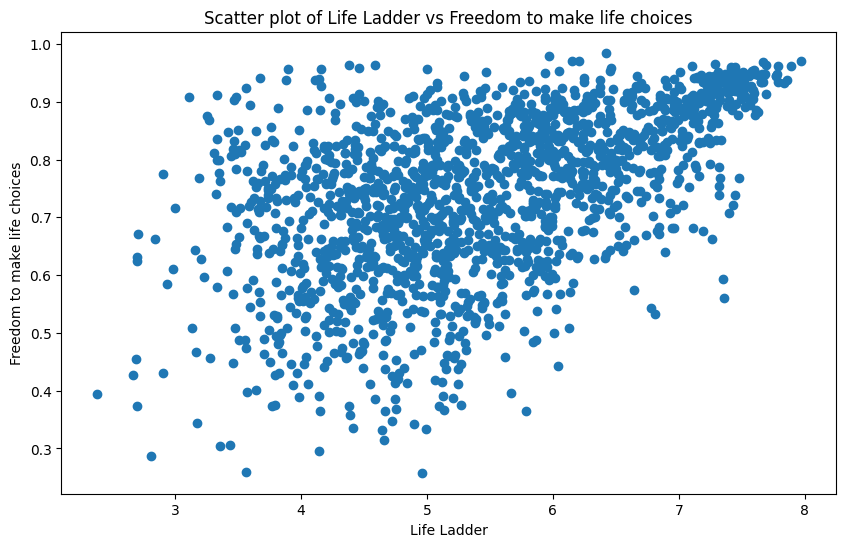

Correlation between Life Ladder and Generosity: 0.18


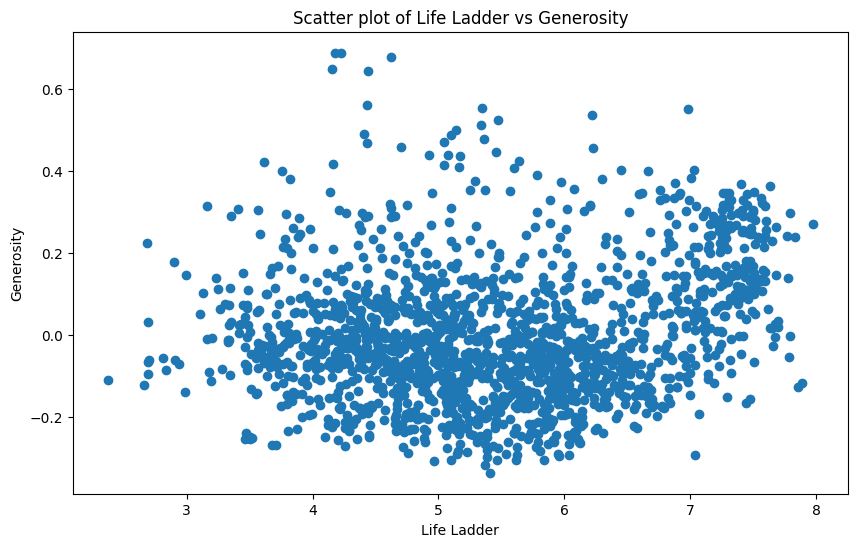

Correlation between Life Ladder and Perceptions of corruption: -0.45


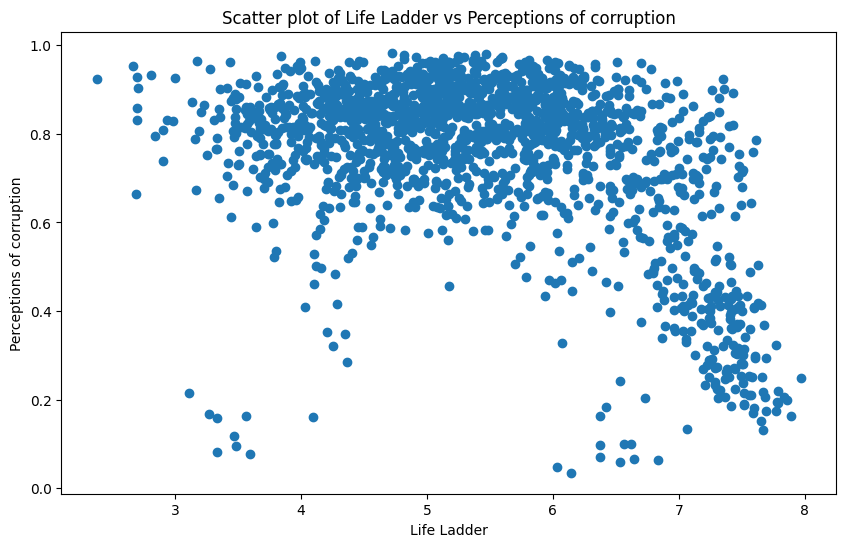

Correlation between Life Ladder and Positive affect: 0.53


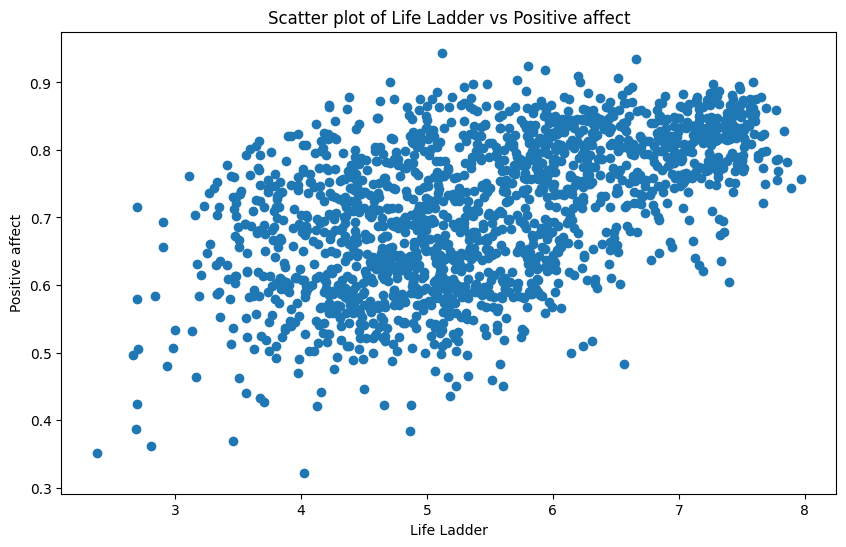

Correlation between Life Ladder and Negative affect: -0.30


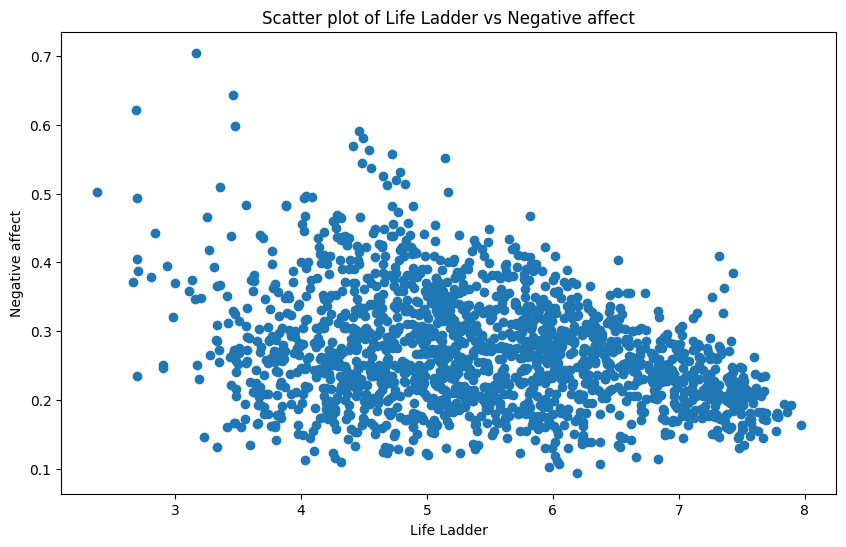

Correlation between Log GDP per capita and Social support: 0.71


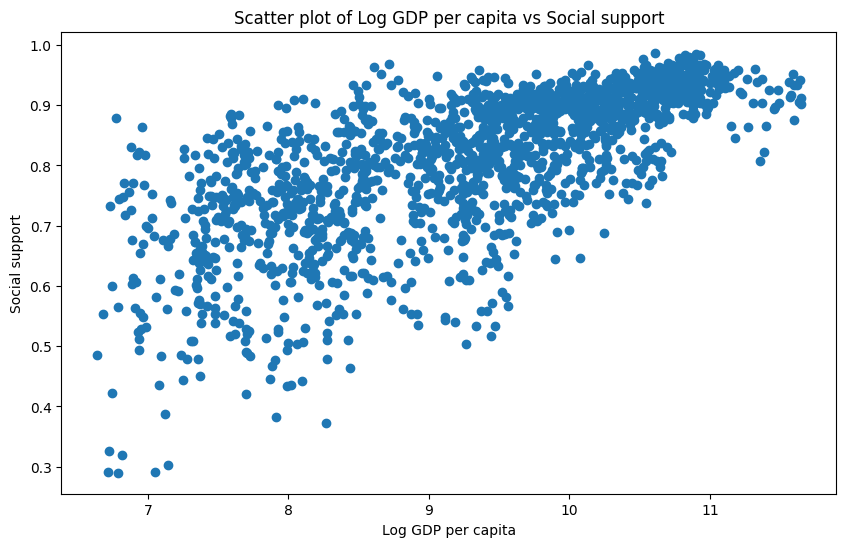

Correlation between Log GDP per capita and Healthy life expectancy at birth: 0.86


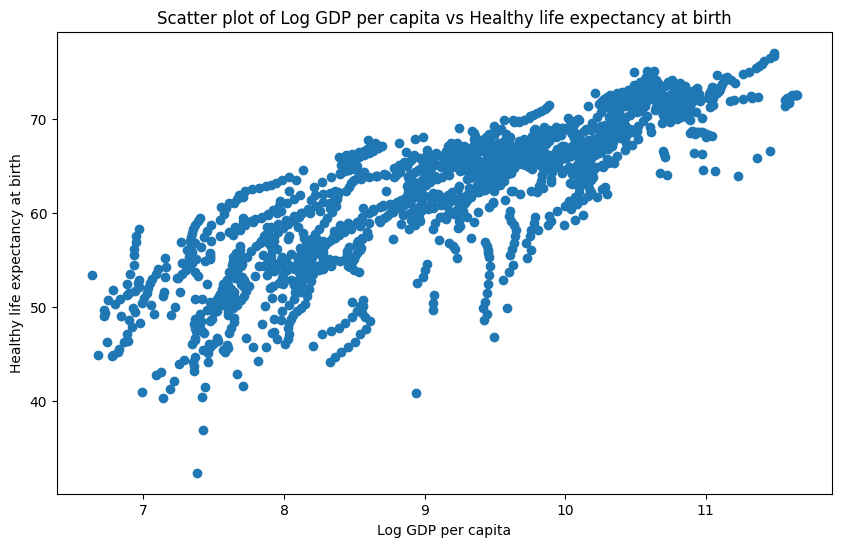

Correlation between Log GDP per capita and Freedom to make life choices: 0.35


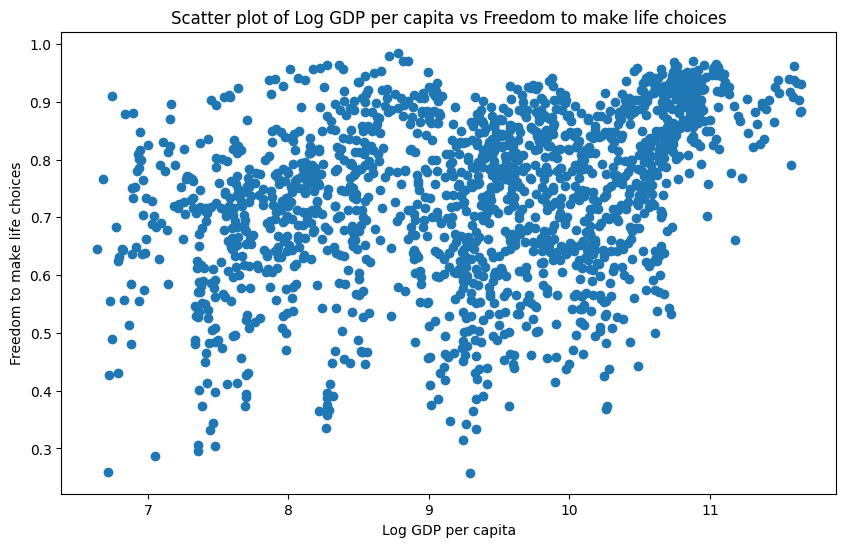

Correlation between Log GDP per capita and Generosity: -0.02


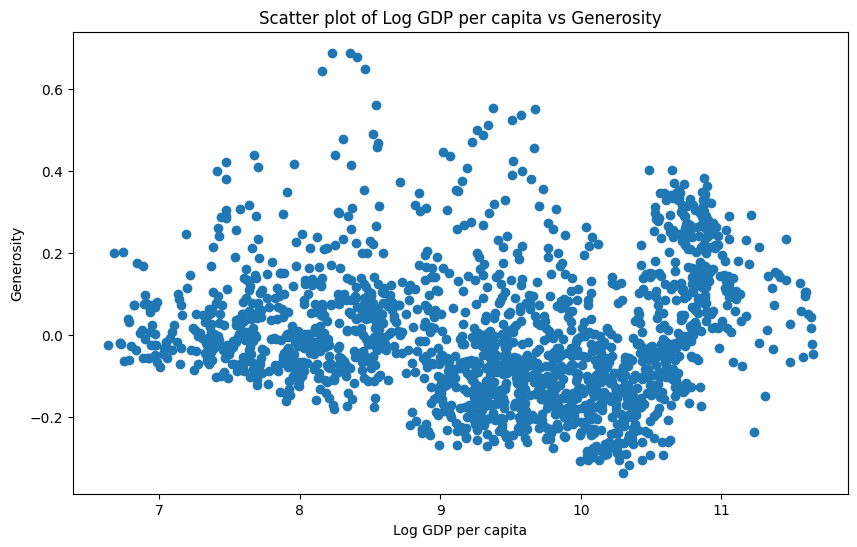

Correlation between Log GDP per capita and Perceptions of corruption: -0.34


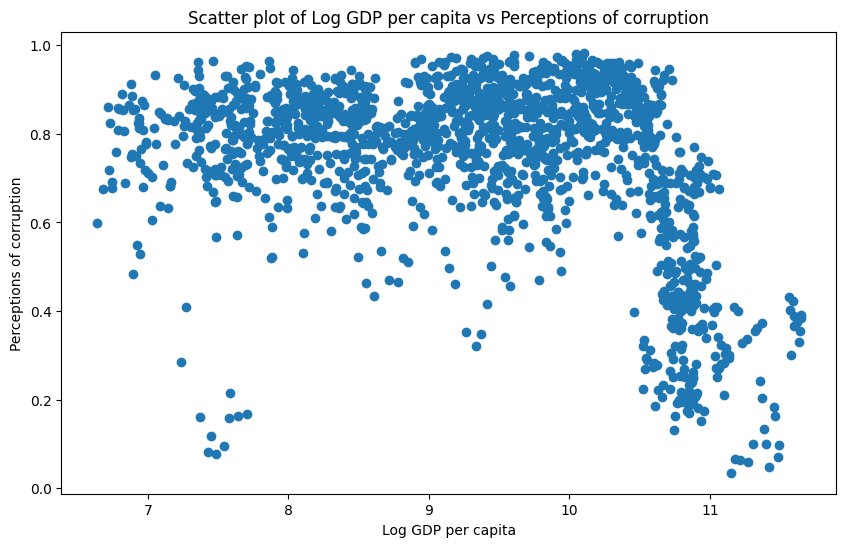

Correlation between Log GDP per capita and Positive affect: 0.30


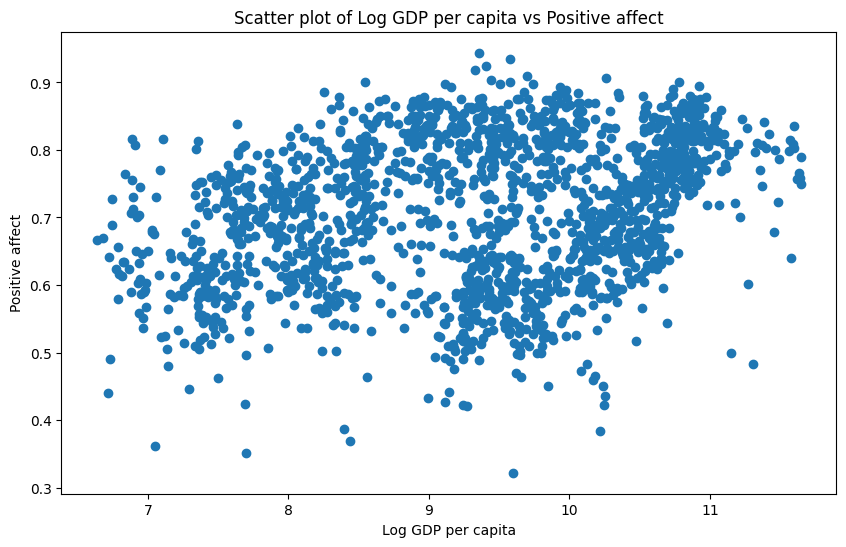

Correlation between Log GDP per capita and Negative affect: -0.22


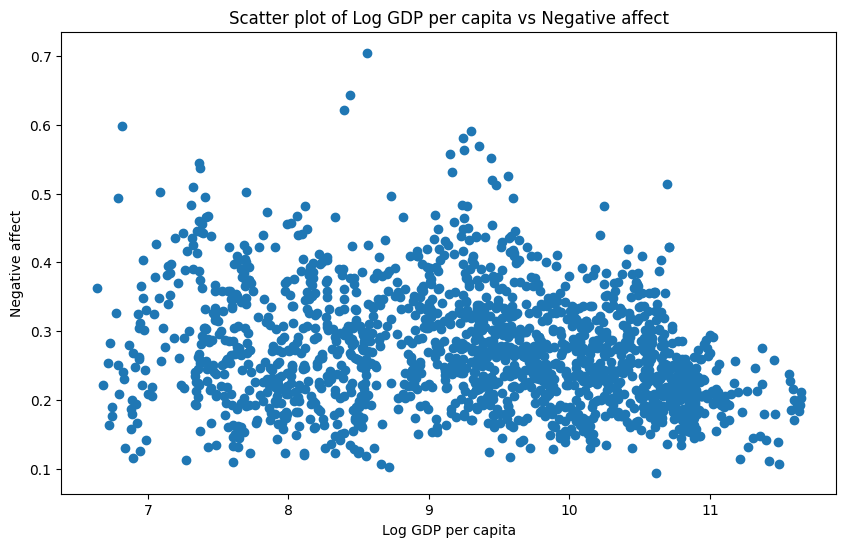

Correlation between Social support and Healthy life expectancy at birth: 0.62


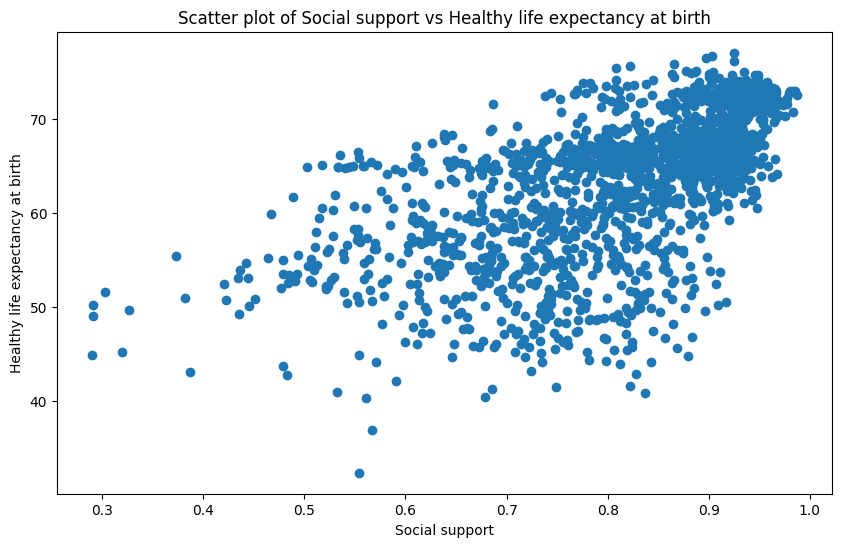

Correlation between Social support and Freedom to make life choices: 0.41


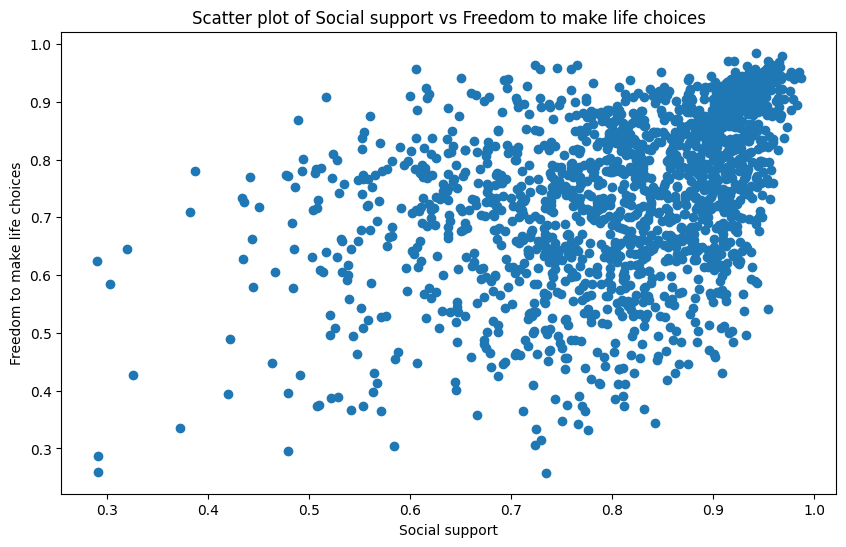

Correlation between Social support and Generosity: 0.06


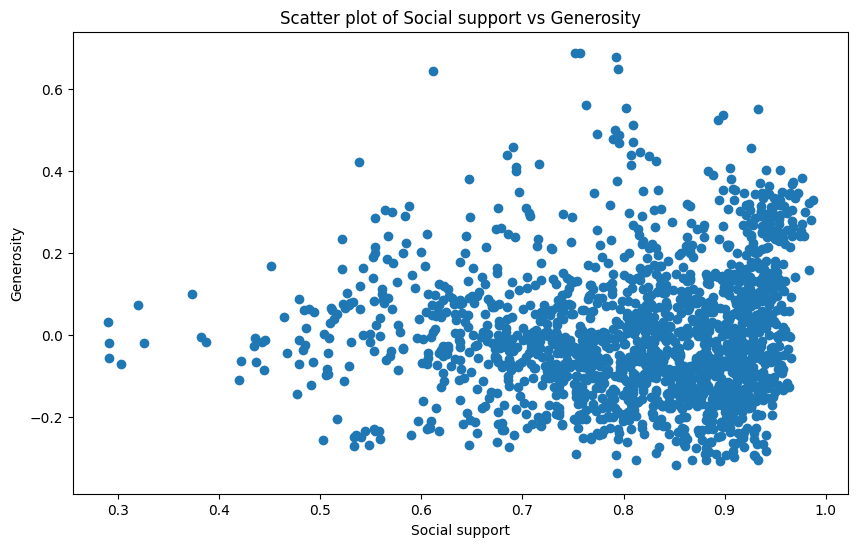

Correlation between Social support and Perceptions of corruption: -0.23


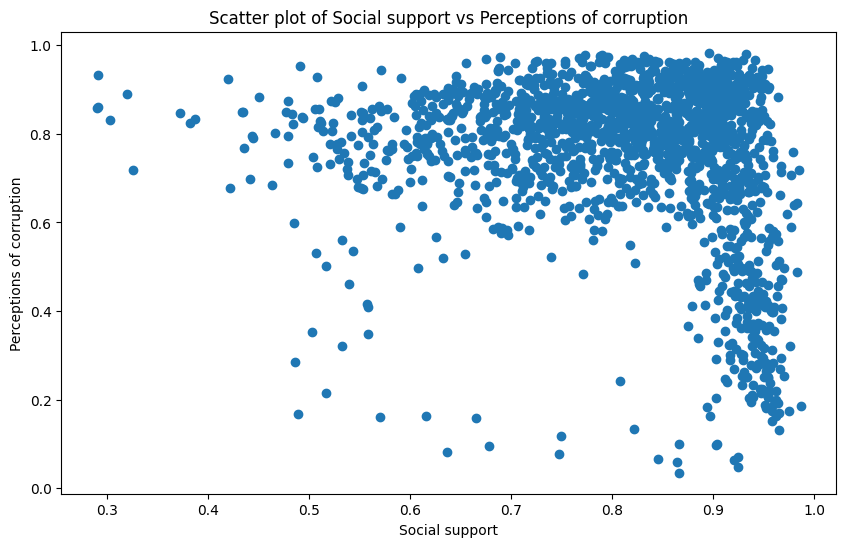

Correlation between Social support and Positive affect: 0.45


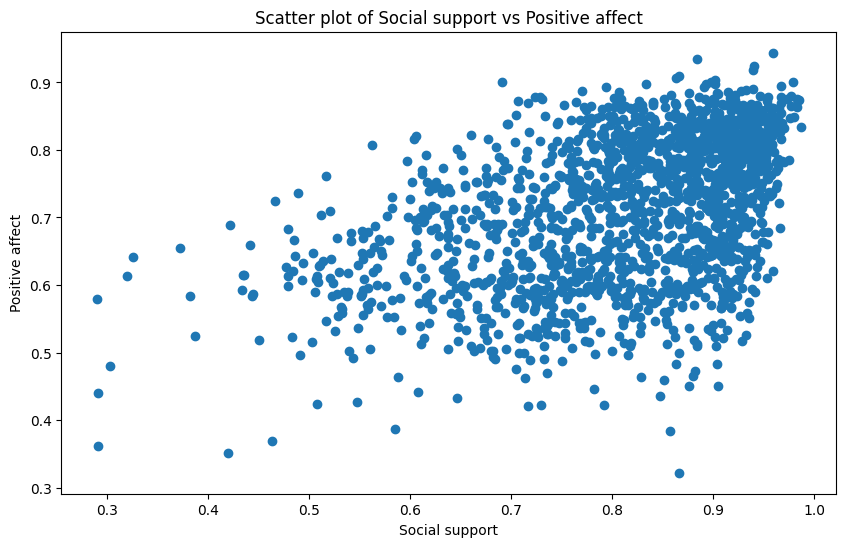

Correlation between Social support and Negative affect: -0.42


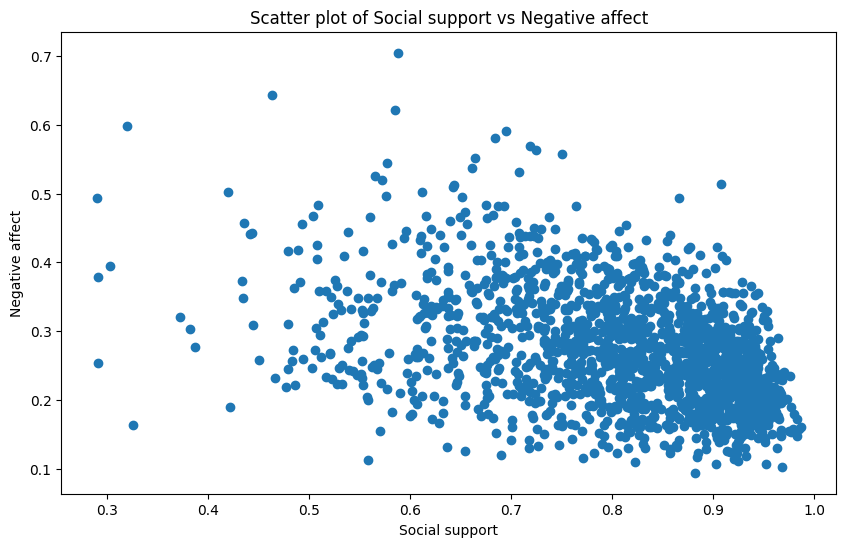

Correlation between Healthy life expectancy at birth and Freedom to make life choices: 0.38


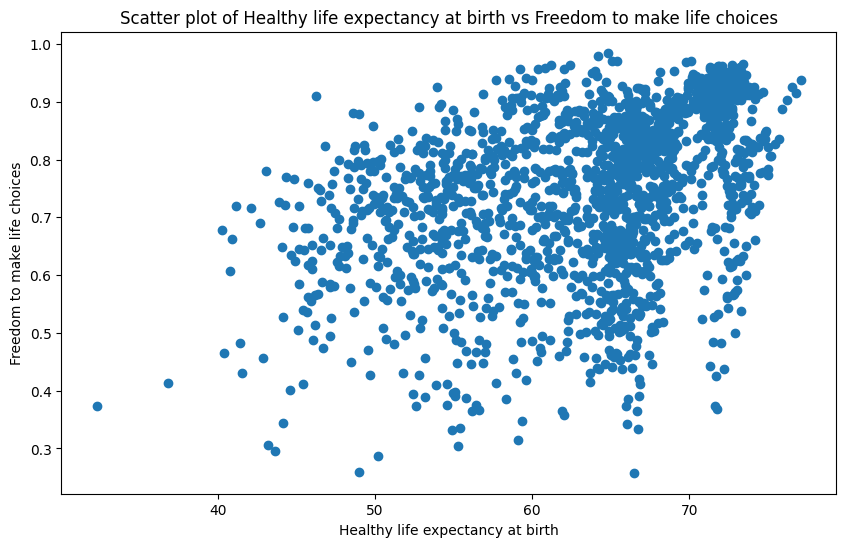

Correlation between Healthy life expectancy at birth and Generosity: 0.02


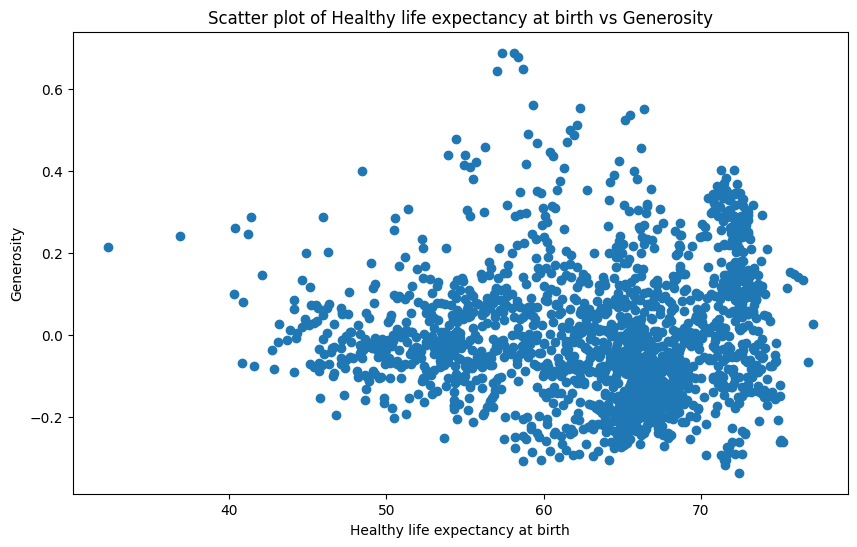

Correlation between Healthy life expectancy at birth and Perceptions of corruption: -0.33


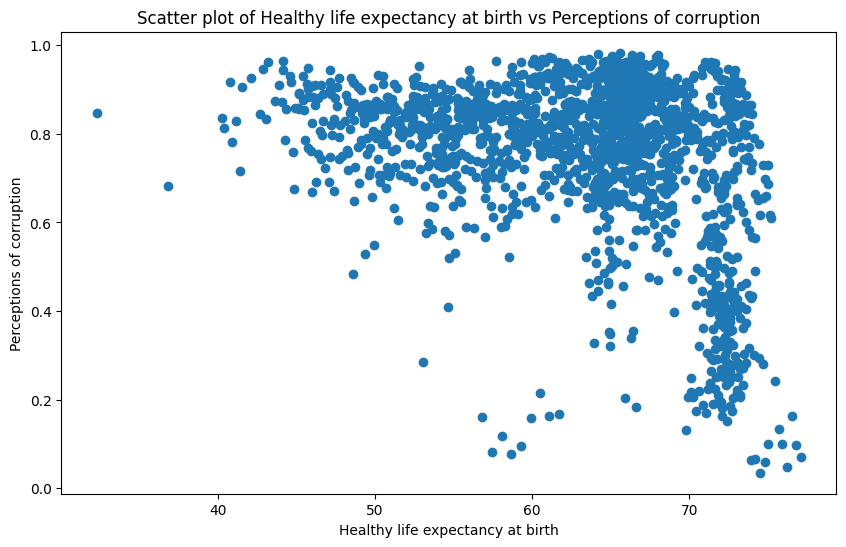

Correlation between Healthy life expectancy at birth and Positive affect: 0.32


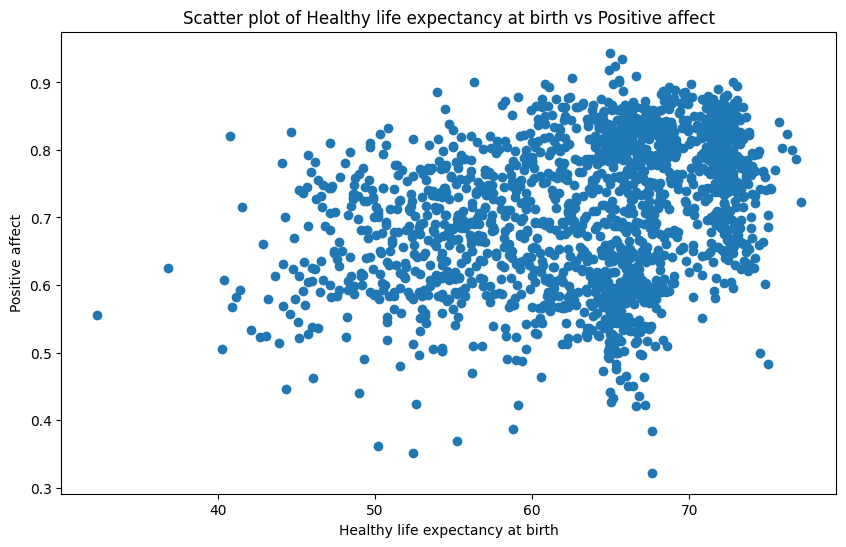

Correlation between Healthy life expectancy at birth and Negative affect: -0.14


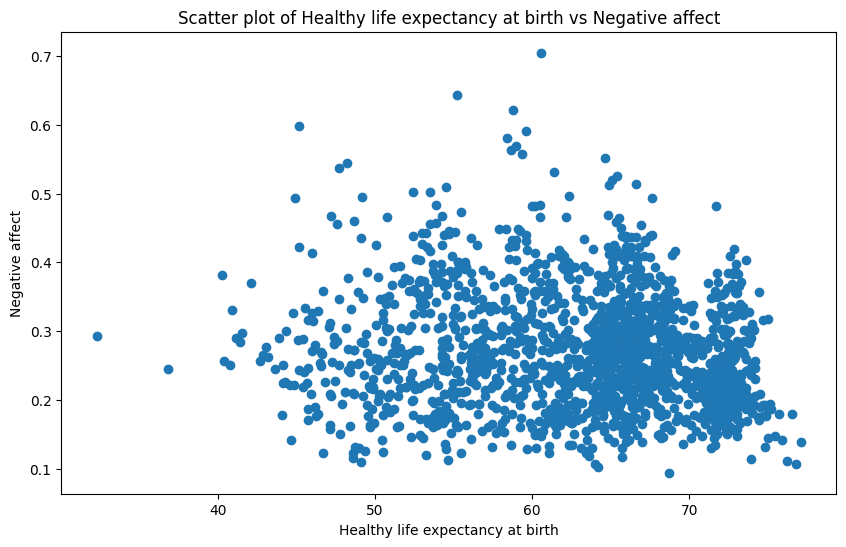

Correlation between Freedom to make life choices and Generosity: 0.33


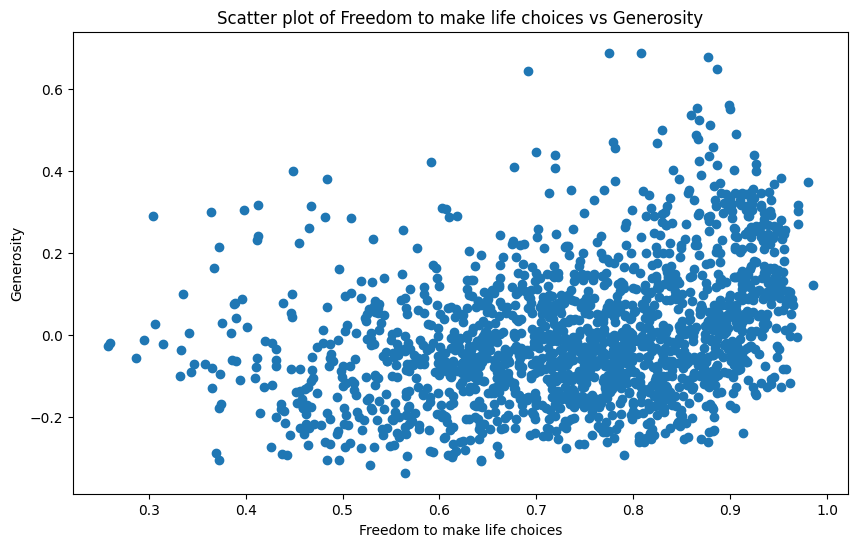

Correlation between Freedom to make life choices and Perceptions of corruption: -0.49


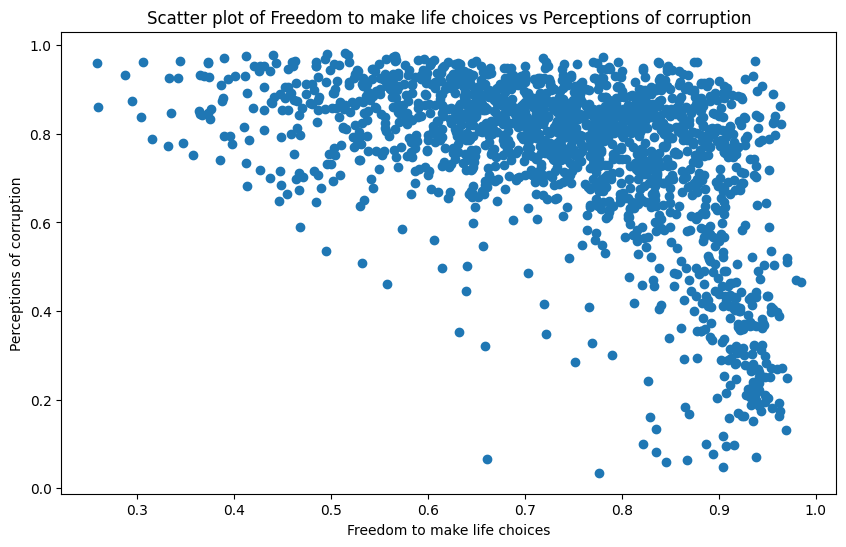

Correlation between Freedom to make life choices and Positive affect: 0.61


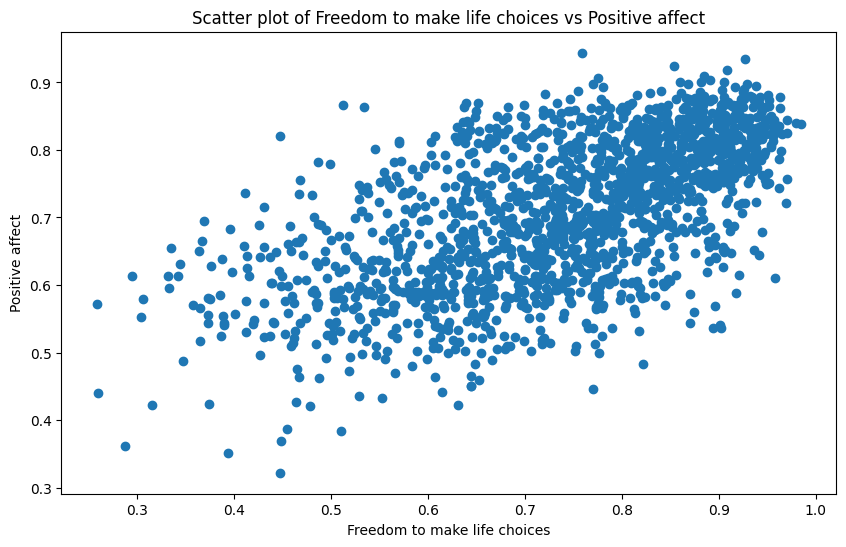

Correlation between Freedom to make life choices and Negative affect: -0.27


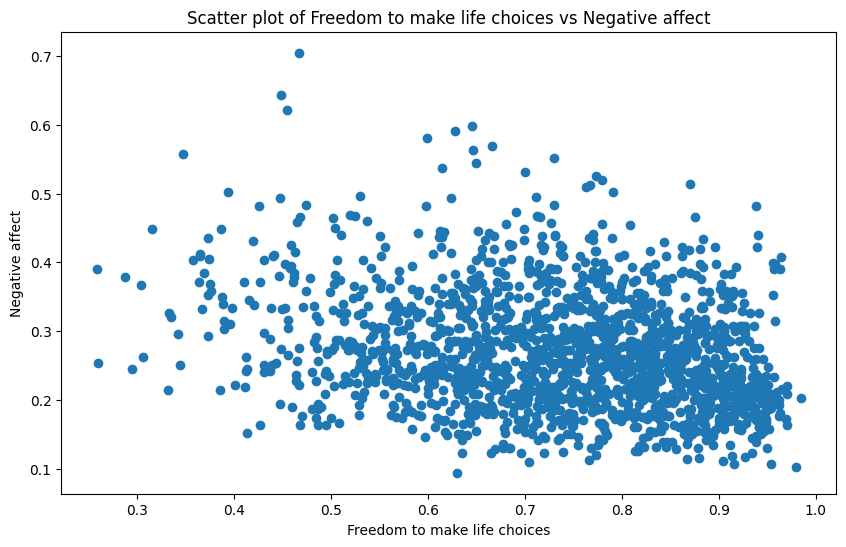

Correlation between Generosity and Perceptions of corruption: -0.29


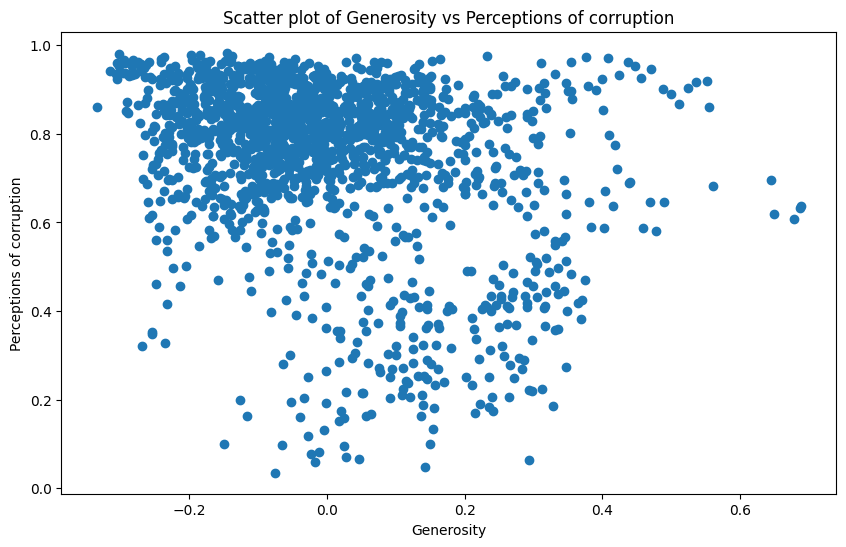

Correlation between Generosity and Positive affect: 0.37


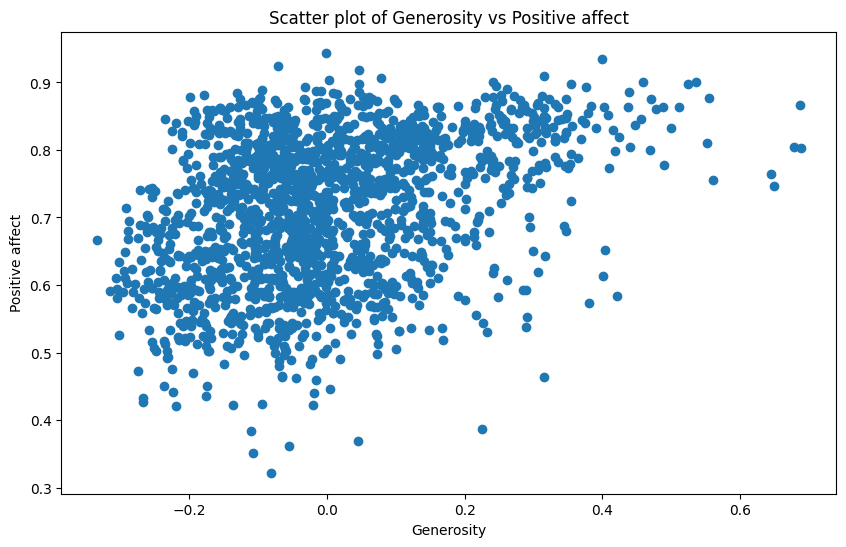

Correlation between Generosity and Negative affect: -0.09


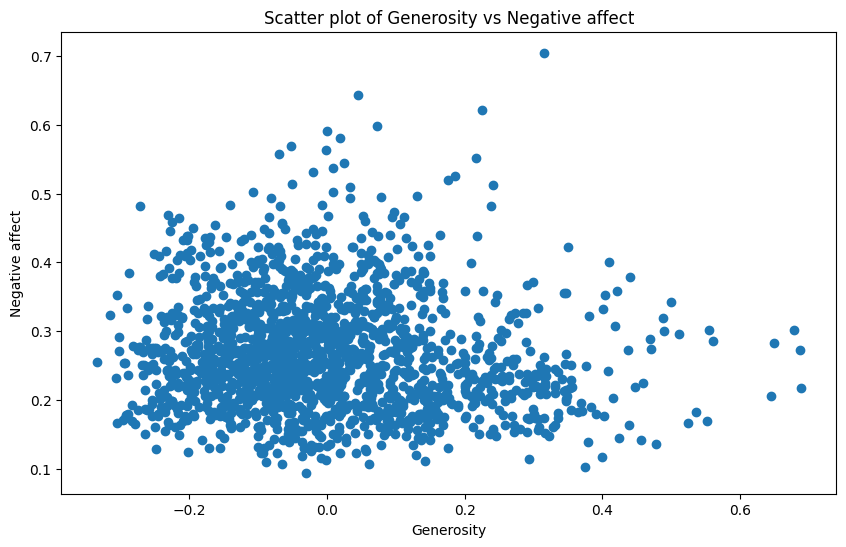

Correlation between Perceptions of corruption and Positive affect: -0.30


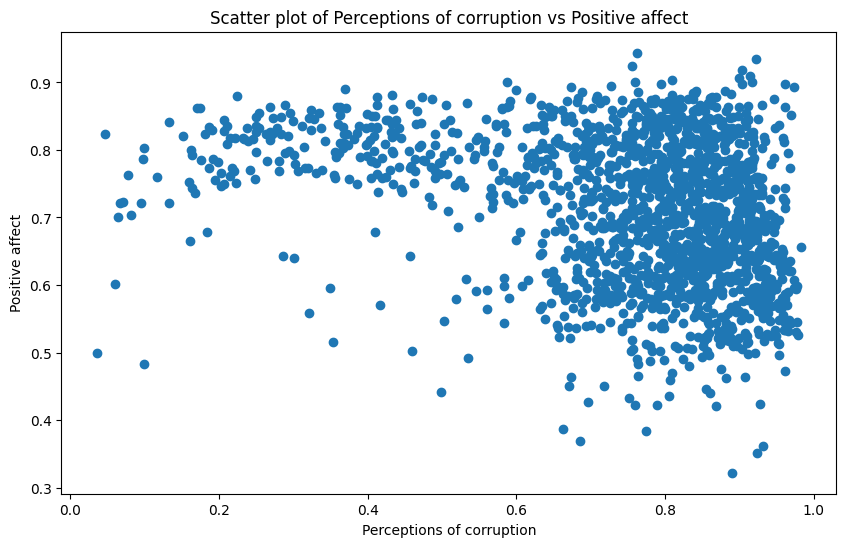

Correlation between Perceptions of corruption and Negative affect: 0.28


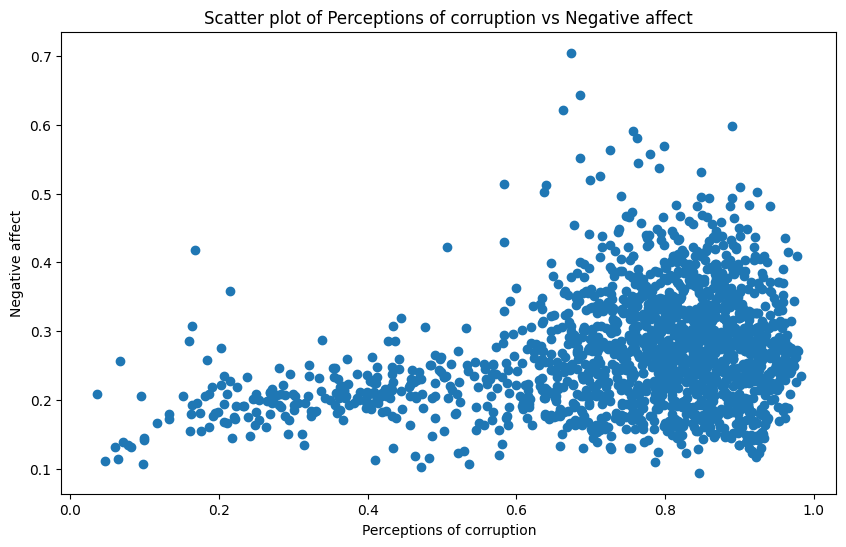

Correlation between Positive affect and Negative affect: -0.36


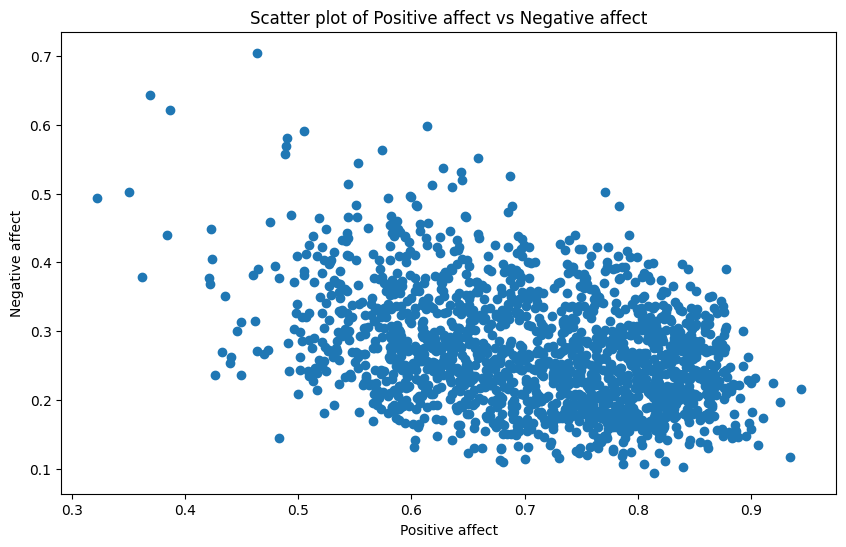

In [ ]:
from scipy.stats import pearsonr

def compute_pcc(feature1, feature2):
  pearsoncorrelation, pearson_value = pearsonr(df1[feature1], df1[feature2])
  print(f'Correlation between {feature1} and {feature2}: {pearsoncorrelation:.2f}')

  plt.figure(figsize=(10, 6))
  plt.scatter(x=feature1, y=feature2, data=df1)
  plt.title(f"Scatter plot of {feature1} vs {feature2}")
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.show()

columns = df1.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(columns)):
  for j in range(i+1, len(columns)):
    compute_pcc(columns[i], columns[j])

In [ ]:
''' Question D
Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.'''

from sklearn.model_selection import train_test_split

features = df1[['Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption']]

target = df1["Life Ladder"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25)

To select 25% of the data for testing, we typically split our dataset into training and testing subsets. This is done using the train_test_split function from scikit-learn, which ensures the data is split randomly, maintaining the overall distribution of features and target.

In [ ]:
x_train.describe()

,Freedom to make life choices,Generosity,Positive affect,Negative affect,Log GDP per capita,Social support,Healthy life expectancy at birth,Perceptions of corruption
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,0.740184,-0.002458,0.708155,0.266844,9.330455,0.810454,63.290890,0.750589
std,0.142794,0.161937,0.108461,0.081190,1.159725,0.121532,7.631584,0.186087
min,0.258000,-0.335000,0.322000,0.103000,6.635000,0.290000,32.300000,0.035000
25%,0.644000,-0.116000,0.622000,0.206000,8.387000,0.740000,58.060000,0.698000
50%,0.759000,-0.023000,0.718000,0.255000,9.461000,0.836000,65.100000,0.805000
75%,0.852000,0.091000,0.799000,0.317000,10.285000,0.907000,68.800000,0.874000
max,0.985000,0.688000,0.944000,0.643000,11.648000,0.987000,77.100000,0.983000


In [ ]:
x_test.describe()

,Freedom to make life choices,Generosity,Positive affect,Negative affect,Log GDP per capita,Social support,Healthy life expectancy at birth,Perceptions of corruption
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,0.737215,0.004824,0.713735,0.277251,9.295471,0.809925,63.029190,0.752220
std,0.143149,0.162670,0.107392,0.088161,1.155151,0.122095,7.856752,0.186062
min,0.260000,-0.295000,0.424000,0.094000,6.719000,0.291000,40.300000,0.060000
25%,0.648500,-0.102000,0.627500,0.216000,8.407500,0.744000,58.310000,0.696000
50%,0.753000,-0.030000,0.731000,0.268000,9.441000,0.834000,65.100000,0.808000
75%,0.853000,0.080500,0.804500,0.326000,10.234000,0.908500,68.400000,0.876500
max,0.970000,0.689000,0.934000,0.705000,11.617000,0.985000,76.800000,0.974000


To verify that the test data is representative of the entire dataset, we compare descriptive statistics (mean, standard deviation, min, max, quartiles) for key features between the training and test sets

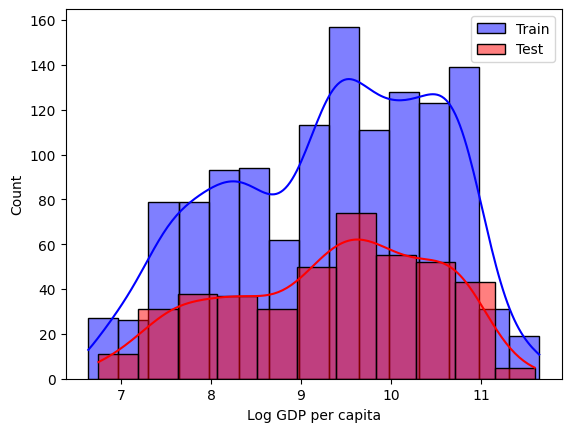

In [ ]:
sns.histplot(x_train["Log GDP per capita"], color="blue", label="Train", kde = True)
sns.histplot(x_test["Log GDP per capita"], color="red", label="Test", kde = True)
plt.legend()
plt.show()

We visualize the distribution of key features in both the training and test sets using histograms to ensure they follow similar patterns.

In [ ]:
# Q E Part 1

import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df1[['Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption']]

target = df1["Life Ladder"]

#ss = StandardScaler()
#new_features = ss.fit_transform(features)

kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)

mse_scores = []

for train_index, test_index in kfold.split(features):
  x_train, x_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target.iloc[train_index], target.iloc[test_index]

  x_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]

  try:
    theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_train)
  except np.linalg.LinAlgError as e:
    print("Matrix Inversion Error: ", e)
    theta_best = None
    continue

  x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]

  y_pred = x_test_b.dot(theta_best)

  mse = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse)

print(f"Mean squared Error: {mse_scores}")
print(f"Average of mse scores: {np.mean(mse_scores)}")

Mean squared Error: [0.30018937629685927, 0.29637833912183653, 0.30843406381797045]
Average of mse scores: 0.3016672597455554


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.7529142656733352

In [ ]:
ss = StandardScaler()
features = ss.fit_transform(features)

number_of_iterations = 1000
learning_rate = 0.01

mse_scores_sgd = []

kfold_sgd = KFold(n_splits = 3, shuffle = True, random_state = 42)

def sgd(x, y, theta, learning_rate, number_of_iterations):
  m = len(y)
  for i in range(number_of_iterations):
    gradients = 2 / m * x.T.dot(x.dot(theta) - y)
    assert not np.any(np.isnan(gradients)), "NaNs in gradients"
    theta -= learning_rate * gradients

  return theta

for train_index, test_index in kfold_sgd.split(features):
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = target.iloc[train_index], target.iloc[test_index]

  x_b_train_sgd = np.c_[np.ones((x_train.shape[0], 1)), x_train]
  x_b_test_sgd = np.c_[np.ones((x_test.shape[0], 1)), x_test]

  theta = np.random.rand(x_b_train_sgd.shape[1])

  assert not np.any(np.isnan(x_b_train_sgd)), "NaNs in x_b_train_sgd"
  assert not np.any(np.isnan(x_b_test_sgd)), "NaNs in x_b_test_sgd"
  assert not np.any(np.isnan(y_train)), "NaNs in y_train"
  assert not np.any(np.isnan(y_test)), "NaNs in y_test"

  model_train = sgd(x_b_train_sgd, y_train, theta, learning_rate, number_of_iterations)

  y_pred_sgd = x_b_test_sgd.dot(model_train)

  mse_calculation = mean_squared_error(y_test, y_pred_sgd)
  mse_scores_sgd.append(mse_calculation)

print(f"Mean squared Error: {mse_scores_sgd}")
print(f"Average of mse scores: {np.mean(mse_scores_sgd)}")

Mean squared Error: [0.30006933806724384, 0.2963096282256141, 0.30900171377125396]
Average of mse scores: 0.30179356002137064


In [ ]:
# Q E Part 2

from sklearn.linear_model import Lasso, Ridge, ElasticNet

alphas = [0.01, 0.1, 1]

lasso_mse_scores = []
ridge_mse_scores = []
elasticnet_mse_scores = []

kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

for alpha in alphas:
  model = Ridge(alpha = alpha)
  mse_scores_alpha = []

  for train_index, test_index in kf.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse_ridge_score = mean_squared_error(y_test, y_pred)
    mse_scores_alpha.append(mse_ridge_score)

  ridge_mse_scores.append((alpha, np.mean(mse_scores_alpha)))

for alpha in alphas:
  model = Lasso(alpha=alpha)
  mse_scores_alpha = []

  for x_index, y_index in kf.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse_lasso_score = mean_squared_error(y_test, y_pred)
    mse_scores_alpha.append(mse_lasso_score)

  lasso_mse_scores.append((alpha, np.mean(mse_scores_alpha)))

for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    mse_scores_alpha = []

    for train_index, test_index in kfold.split(features):
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        elastic.fit(x_train, y_train)
        y_pred = elastic.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        mse_scores_alpha.append(mse)

    elasticnet_mse_scores.append((alpha, np.mean(mse_scores_alpha)))

print("Ridge MSE Scores:", ridge_mse_scores)
print("Lasso MSE Scores:", lasso_mse_scores)
print("Elastic Net MSE Scores:", elasticnet_mse_scores)

Ridge MSE Scores: [(0.01, 0.3016671616387545), (0.1, 0.3016662816135836), (1, 0.3016577694492134)]
Lasso MSE Scores: [(0.01, 0.30833340026556405), (0.1, 0.32454440867220213), (1, 1.2490612762125481)]
Elastic Net MSE Scores: [(0.01, 0.3017847866108334), (0.1, 0.30922855800695426), (1, 0.779960748308258)]


1. Ridge Regression

  MSE Scores:

      (0.01, 0.3017)
      (0.1, 0.3017)
      (1, 0.3017)

      Impact: Ridge shows very stable performance across the different values of alpha, with only a slight decrease in MSE as the penalty term increases. This indicates that the features are not strongly collinear or the model is not overfitting to the data, so adding more regularization (increasing α) doesn't drastically impact the model's ability to generalize.

2. Lasso Regression

  MSE Scores:

  (0.01, 0.3083)
  (0.1, 0.3245)
  (1, 1.2491)

  Impact: As alpha increases, the MSE increases significantly, especially at alpha = 1. This suggests that with larger regularization, Lasso is shrinking coefficients more aggressively, possibly removing important features from the model. In this case, too much regularization (alpha = 1) is likely harming the model's performance, causing underfitting.

3. Elastic Net

  MSE Scores:
  (0.01, 0.3018)
  (0.1, 0.3092)
  (1, 0.7800)

  Impact: Elastic Net, which combines L1 and L2 regularization, follows a similar trend as Lasso. A small increase in alpha doesn't harm the model much, but at alpha = 1, the MSE increases significantly. Elastic Net provides a balance between Ridge and Lasso, but high regularization still leads to poorer performance.

  Conclusion:
  Ridge Regression performs consistently well across the penalty terms.
  Lasso Regression shows higher sensitivity to the penalty term, with larger values of alpha (like 1) leading to significantly worse performance due to aggressive shrinkage of coefficients.
  Elastic Net is more balanced but, like Lasso, suffers from high regularization.

In [ ]:
# Q E Part 3

batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]
number_of_iterations = 50

def sgd_mini_batch(x, y, theta, learning_rates, number_of_iterations, batch_size):
  m = len(y)
  for i in range(number_of_iterations):
    for batch_start in range(0, m, batch_size):
        x_batch = x[batch_start:batch_start+batch_size]
        y_batch = y[batch_start:batch_start+batch_size]

        gradients = 2 / batch_size * x_batch.T.dot(x_batch.dot(theta) - y_batch)
        theta -= learning_rate * gradients

  return theta

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
mse_results = {}

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        mse_scores = []

        for train_index, test_index in kfold.split(features):
            x_train, x_test = features[train_index], features[test_index]
            y_train, y_test = target.iloc[train_index], target.iloc[test_index]

            x_b_train_sgd = np.c_[np.ones((x_train.shape[0], 1)), x_train]
            x_b_test_sgd = np.c_[np.ones((x_test.shape[0], 1)), x_test]

            theta = np.random.rand(x_b_train_sgd.shape[1])

            model_train = sgd_mini_batch(x_b_train_sgd, y_train, theta, learning_rate, number_of_iterations, batch_size)

            y_pred_sgd = x_b_test_sgd.dot(model_train)

            mse_calculation = mean_squared_error(y_test, y_pred_sgd)
            mse_scores.append(mse_calculation)

        mse_results[(batch_size, learning_rate)] = np.mean(mse_scores)

for key, mse in mse_results.items():
    print(f"Batch Size: {key[0]}, Learning Rate: {key[1]}, Average MSE: {mse}")

Batch Size: 16, Learning Rate: 0.001, Average MSE: 0.30734553694288175
Batch Size: 16, Learning Rate: 0.01, Average MSE: 0.3046003202335883
Batch Size: 16, Learning Rate: 0.1, Average MSE: 0.43054116745640875
Batch Size: 32, Learning Rate: 0.001, Average MSE: 0.3416318621067586
Batch Size: 32, Learning Rate: 0.01, Average MSE: 0.30250188699907316
Batch Size: 32, Learning Rate: 0.1, Average MSE: 0.35499152298580317
Batch Size: 64, Learning Rate: 0.001, Average MSE: 1.0675399034436672
Batch Size: 64, Learning Rate: 0.01, Average MSE: 0.3019064918730708
Batch Size: 64, Learning Rate: 0.1, Average MSE: 0.3317019853402994


Description of Findings:
1. Impact of Batch Size:
  Smaller Batch Size (e.g., 16):

  The model parameters are updated more frequently since each batch contains fewer samples.
  This often results in more noisy updates, but can help the model converge faster or escape local minima.
  May also introduce instability if the batch size is too small, leading to less reliable gradients.

  Larger Batch Size (e.g., 64):

  Larger batches provide smoother updates but at the cost of slower convergence since fewer updates are made per epoch.
  The gradients computed with larger batches are more stable, leading to more reliable updates but potentially slower progress towards the minimum.

2. Impact of Learning Rate:

  Smaller Learning Rate (e.g., 0.001):

  With a smaller learning rate, the model converges more slowly. This could be beneficial if your data is complex and you want more precise, gradual updates.
  Too small a learning rate can cause the model to take an excessively long time to converge or get stuck in local minima.

  Larger Learning Rate (e.g., 0.1):

  Higher learning rates can speed up convergence but may lead to overshooting the optimal solution, causing the model to diverge or oscillate around the minimum.
  If the learning rate is too high, you might see a rise in the MSE, indicating that the model isn’t converging properly.

Iteration 0: Training Loss = 24.680979977948116, Validation Loss = 25.003028035797655
Iteration 10: Training Loss = 19.927182575687457, Validation Loss = 20.188458477096734
Iteration 20: Training Loss = 16.138084785994838, Validation Loss = 16.355564944200783
Iteration 30: Training Loss = 13.100060357036773, Validation Loss = 13.28436403239587
Iteration 40: Training Loss = 10.655457646293053, Validation Loss = 10.813477620317064
Iteration 50: Training Loss = 8.68400151149485, Validation Loss = 8.820431421689657
Iteration 60: Training Loss = 7.091893556510414, Validation Loss = 7.210112307356515
Iteration 70: Training Loss = 5.804959006453093, Validation Loss = 5.907541290499999
Iteration 80: Training Loss = 4.7640355754104755, Validation Loss = 4.853045754899863
Iteration 90: Training Loss = 3.921687571587467, Validation Loss = 3.9988487370971924
Iteration 100: Training Loss = 3.239760412141647, Validation Loss = 3.306552081455491
Iteration 110: Training Loss = 2.6875048601734104, Vali

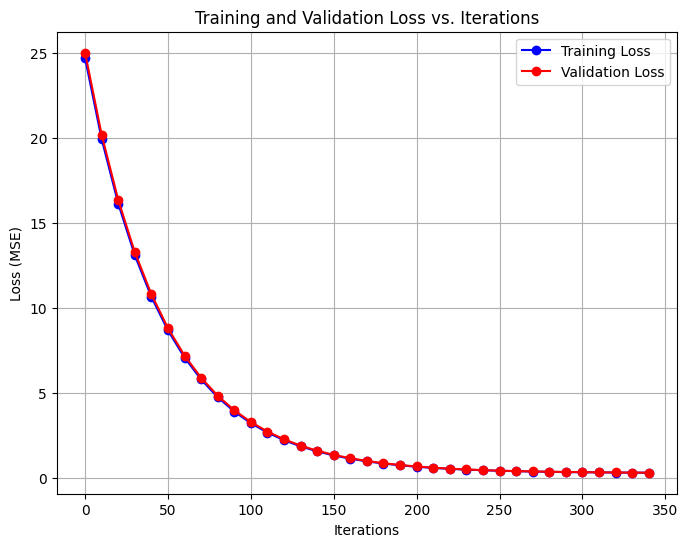

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def sgd_with_loss_tracking(x_train, y_train, x_val, y_val, theta, learning_rate, number_of_iterations, batch_size):
    m_train = len(y_train)
    training_loss = []
    validation_loss = []

    for i in range(number_of_iterations):
        for batch_start in range(0, m_train, batch_size):
            x_batch = x_train[batch_start:batch_start+batch_size]
            y_batch = y_train[batch_start:batch_start+batch_size]

            gradients = 2 / batch_size * x_batch.T.dot(x_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        if i % 10 == 0:
            y_train_pred = x_train.dot(theta)
            y_val_pred = x_val.dot(theta)

            train_loss = mean_squared_error(y_train, y_train_pred)
            val_loss = mean_squared_error(y_val, y_val_pred)

            training_loss.append(train_loss)
            validation_loss.append(val_loss)

    return theta, training_loss, validation_loss

batch_size = 32
learning_rate = 0.00015
number_of_iterations = 350

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

avg_training_loss = np.zeros(number_of_iterations // 10)
avg_validation_loss = np.zeros(number_of_iterations // 10)

for train_index, test_index in kfold.split(features):
    x_train, x_val = features[train_index], features[test_index]
    y_train, y_val = target.iloc[train_index], target.iloc[test_index]

    x_b_train_sgd = np.c_[np.ones((x_train.shape[0], 1)), x_train]
    x_b_val_sgd = np.c_[np.ones((x_val.shape[0], 1)), x_val]

    theta = np.random.rand(x_b_train_sgd.shape[1])

    model_train, training_loss, validation_loss = sgd_with_loss_tracking(
        x_b_train_sgd, y_train, x_b_val_sgd, y_val, theta, learning_rate, number_of_iterations, batch_size
    )

    avg_training_loss += np.array(training_loss)
    avg_validation_loss += np.array(validation_loss)

avg_training_loss /= 3
avg_validation_loss /= 3

for i in range(len(avg_training_loss)):
    print(f"Iteration {i * 10}: Training Loss = {avg_training_loss[i]}, Validation Loss = {avg_validation_loss[i]}")

iterations = np.arange(0, number_of_iterations, 10)

plt.figure(figsize=(8, 6))
plt.plot(iterations, avg_training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(iterations, avg_validation_loss, label='Validation Loss', color='red', marker='o')

plt.title('Training and Validation Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import torch
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

X = df1[['Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption']]
y = df1["Life Ladder"].values

ss = StandardScaler()
X = ss.fit_transform(X)

def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

def normal_equation(X, y):
    X_torch = torch.tensor(X, dtype=torch.float32).to(device)
    y_torch = torch.tensor(y, dtype=torch.float32).to(device)
    theta = torch.linalg.inv(X_torch.T @ X_torch) @ (X_torch.T @ y_torch)
    return theta.cpu().numpy()  # Moving result back to CPU for further processing

def stochastic_gradient_descent(X, y, learning_rate=0.001, epochs=1000, clip_value=1.0):
    m, n = X.shape
    theta = torch.randn(n, device=device, dtype=torch.float32)  # Initialize theta on GPU
    X_torch = torch.tensor(X, dtype=torch.float32).to(device)
    y_torch = torch.tensor(y, dtype=torch.float32).to(device)

    for epoch in range(epochs):
        for i in range(m):
            random_idx = np.random.randint(m)
            xi = X_torch[random_idx:random_idx+1]
            yi = y_torch[random_idx:random_idx+1]
            gradients = 2 * xi.T @ (xi @ theta - yi)

            gradients = torch.clamp(gradients, -clip_value, clip_value)
            theta -= learning_rate * gradients

    return theta.cpu().numpy()

def k_fold_cross_validation(X, y, degree, k=3, use_sgd=False):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_errors = []
    val_errors = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        X_train_poly = generate_polynomial_features(X_train, degree)
        X_val_poly = generate_polynomial_features(X_val, degree)

        if use_sgd:
            theta = stochastic_gradient_descent(X_train_poly, y_train)
        else:
            theta = normal_equation(X_train_poly, y_train)

        y_train_pred = X_train_poly.dot(theta)
        y_val_pred = X_val_poly.dot(theta)

        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    return np.mean(train_errors), np.mean(val_errors)

degree = 3
k = 3

train_loss_normal, val_loss_normal = k_fold_cross_validation(X, y, degree, k=k, use_sgd=False)
print(f"Normal Equation: Train Loss = {train_loss_normal}, Val Loss = {val_loss_normal}")

train_loss_sgd, val_loss_sgd = k_fold_cross_validation(X, y, degree, k=k, use_sgd=True)
print(f"SGD: Train Loss = {train_loss_sgd}, Val Loss = {val_loss_sgd}")


Using device: cuda
Normal Equation: Train Loss = 0.1713394799870084, Val Loss = 0.28584641225071
SGD: Train Loss = 76.58459054989923, Val Loss = 65.93017866130769


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

X = df1[['Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption']]
y = df1["Life Ladder"]

ss_X = StandardScaler()
X = ss_X.fit_transform(X)

ss_y = StandardScaler()

y = ss_y.fit_transform(y.values.reshape(-1, 1)).flatten()

def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

def k_fold_cross_validation_regularized(X, y, degree, k=3, model_type='ridge', penalty=1.0):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_errors = []
    val_errors = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        X_train_poly = generate_polynomial_features(X_train, degree)
        X_val_poly = generate_polynomial_features(X_val, degree)

        if model_type == 'ridge':
            model = Ridge(alpha=penalty)
        elif model_type == 'lasso':
            model = Lasso(alpha=penalty, max_iter=10000)
        elif model_type == 'elasticnet':
            model = ElasticNet(alpha=penalty, l1_ratio=0.5, max_iter=10000)

        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

        y_train_pred_orig = ss_y.inverse_transform(y_train_pred.reshape(-1, 1))
        y_val_pred_orig = ss_y.inverse_transform(y_val_pred.reshape(-1, 1))
        y_train_orig = ss_y.inverse_transform(y_train.reshape(-1, 1))
        y_val_orig = ss_y.inverse_transform(y_val.reshape(-1, 1))

        train_mse = mean_squared_error(y_train_orig, y_train_pred_orig)
        val_mse = mean_squared_error(y_val_orig, y_val_pred_orig)

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    return np.mean(train_errors), np.mean(val_errors)


degree = 3
k = 3

penalties = [0.01, 0.1, 1.0]

for penalty in penalties:
    print(f"\n--- Ridge Regularization (Penalty = {penalty}) ---")
    train_loss_ridge, val_loss_ridge = k_fold_cross_validation_regularized(X, y, degree, k=k, model_type='ridge', penalty=penalty)
    print(f"Train Loss: {train_loss_ridge}, Validation Loss: {val_loss_ridge}")

    print(f"\n--- Lasso Regularization (Penalty = {penalty}) ---")
    train_loss_lasso, val_loss_lasso = k_fold_cross_validation_regularized(X, y, degree, k=k, model_type='lasso', penalty=penalty)
    print(f"Train Loss: {train_loss_lasso}, Validation Loss: {val_loss_lasso}")

    print(f"\n--- Elastic Net Regularization (Penalty = {penalty}) ---")
    train_loss_enet, val_loss_enet = k_fold_cross_validation_regularized(X, y, degree, k=k, model_type='elasticnet', penalty=penalty)
    print(f"Train Loss: {train_loss_enet}, Validation Loss: {val_loss_enet}")



--- Ridge Regularization (Penalty = 0.01) ---
Train Loss: 0.17133757515747924, Validation Loss: 0.28588022469403485

--- Lasso Regularization (Penalty = 0.01) ---
Train Loss: 0.21428629106430752, Validation Loss: 0.24715034361185048

--- Elastic Net Regularization (Penalty = 0.01) ---
Train Loss: 0.20129242544166145, Validation Loss: 0.24787529197741345

--- Ridge Regularization (Penalty = 0.1) ---
Train Loss: 0.17134063807719824, Validation Loss: 0.28538151339540874

--- Lasso Regularization (Penalty = 0.1) ---
Train Loss: 0.315446781747487, Validation Loss: 0.3288613109346638

--- Elastic Net Regularization (Penalty = 0.1) ---
Train Loss: 0.27048877482858974, Validation Loss: 0.28344806633585923

--- Ridge Regularization (Penalty = 1.0) ---
Train Loss: 0.1715461706131889, Validation Loss: 0.28156417607985484

--- Lasso Regularization (Penalty = 1.0) ---
Train Loss: 0.8710698448844175, Validation Loss: 0.8949572320329224

--- Elastic Net Regularization (Penalty = 1.0) ---
Train Loss:

1. Ridge Regularization (L2 Penalty)

  Penalty = 0.01:

  Train Loss: 0.1713

  Validation Loss: 0.2859

  At this low penalty, Ridge regularization has a small effect, resulting in low training and validation loss. The model fits the data well and generalizes reasonably.
  Penalty = 0.1:

  Train Loss: 0.1713

  Validation Loss: 0.2854

  The losses remain nearly the same compared to the penalty of 0.01. This indicates that even with a slight increase in the penalty, the model's performance is stable, with minimal overfitting or underfitting.
  Penalty = 1.0:

  Train Loss: 0.1715

  Validation Loss: 0.2816

  At a penalty of 1.0, Ridge starts to have a stronger regularization effect. The training loss increases slightly, but the validation loss decreases marginally, suggesting better generalization as the model becomes less prone to overfitting.

  Impact: Ridge regularization introduces smooth shrinkage in the coefficients as the penalty increases, resulting in stable performance. It improves generalization slightly as the penalty increases by controlling overfitting, but the overall impact is mild at the chosen penalty levels.

2. Lasso Regularization (L1 Penalty)

  Penalty = 0.01:

  Train Loss: 0.2143

  Validation Loss: 0.2472

  At a small penalty, Lasso starts shrinking the coefficients aggressively compared to Ridge. The training loss increases slightly, but the validation loss decreases, which suggests that Lasso is selecting more relevant features, leading to better generalization.

  Penalty = 0.1:

  Train Loss: 0.3154

  Validation Loss: 0.3289

  A larger penalty increases both the train and validation loss significantly. This indicates that the model is shrinking the coefficients too much, possibly discarding some important features. The model underfits the data, leading to worse performance.

  Penalty = 1.0:

  Train Loss: 0.8711

  Validation Loss: 0.8950

  At a high penalty, Lasso heavily regularizes the model. The training and validation losses are much higher, indicating strong underfitting. The model has likely shrunk many coefficients to zero, severely limiting its predictive ability.

  Impact: Lasso regularization aggressively shrinks the coefficients as the penalty increases. While it can improve generalization at low penalties by selecting relevant features, high penalties cause the model to underfit, discarding too much information. This is evident as both training and validation losses increase dramatically for higher penalties.

3. Elastic Net Regularization (Combination of L1 and L2 Penalty)

  Penalty = 0.01:

  Train Loss: 0.2013

  Validation Loss: 0.2479

  Elastic Net, at a low penalty, balances between Ridge and Lasso behaviors. It effectively controls overfitting, similar to Lasso, and leads to decent generalization with relatively low validation loss. It shows better results than Ridge at low penalties.

  Penalty = 0.1:

  Train Loss: 0.2705

  Validation Loss: 0.2834

  At a medium penalty, the training and validation loss both increase, but the validation loss is lower than Lasso alone. Elastic Net provides a middle ground between the L1 and L2 penalties, leading to reasonable generalization without as much underfitting as Lasso at this level.

  Penalty = 1.0:

  Train Loss: 0.6323

  Validation Loss: 0.6542

  At the highest penalty, Elastic Net shrinks coefficients too much, like Lasso, but not as aggressively. However, the increased training and validation losses indicate that the model is starting to underfit and cannot capture the underlying relationships effectively.

  Impact: Elastic Net balances between Ridge and Lasso, showing more flexibility. At lower penalties, it performs similarly to Lasso, improving generalization by shrinking less important coefficients. At higher penalties, it avoids the extreme underfitting seen with Lasso but still suffers from reduced performance.



In [ ]:
X = df1[['Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect',
          'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption']]

y = df1["Life Ladder"].values  # Convert y to a NumPy array

ss = StandardScaler()
X = ss.fit_transform(X)

def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

def stochastic_gradient_descent_minibatch(X, y, learning_rate=0.01, epochs=1000, batch_size=32, clip_value=1.0):
    m, n = X.shape
    theta = np.random.randn(n)
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            Xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2 * Xi.T.dot(Xi.dot(theta) - yi) / len(Xi)

            # Gradient Clipping
            gradients = np.clip(gradients, -clip_value, clip_value)

            theta = theta - learning_rate * gradients
    return theta

def k_fold_cross_validation_sgd(X, y, degree, k=3, learning_rate=0.01, batch_size=32, clip_value=1.0):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_errors = []
    val_errors = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]  # Use NumPy array indexing

        X_train_poly = generate_polynomial_features(X_train, degree)
        X_val_poly = generate_polynomial_features(X_val, degree)

        theta = stochastic_gradient_descent_minibatch(X_train_poly, y_train, learning_rate=learning_rate, batch_size=batch_size, clip_value=clip_value)

        y_train_pred = X_train_poly.dot(theta)
        y_val_pred = X_val_poly.dot(theta)

        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    return np.mean(train_errors), np.mean(val_errors)

batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]
degree = 3
clip_value = 1.0

results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        train_loss, val_loss = k_fold_cross_validation_sgd(X, y, degree, k=3, learning_rate=lr, batch_size=batch_size, clip_value=clip_value)
        results.append((batch_size, lr, train_loss, val_loss))
        print(f"Batch Size: {batch_size}, Learning Rate: {lr} -> Train Loss: {train_loss}, Validation Loss: {val_loss}")


Batch Size: 16, Learning Rate: 0.001 -> Train Loss: 0.9114563040529208, Validation Loss: 1.9712867260222602
Batch Size: 16, Learning Rate: 0.01 -> Train Loss: 1.0127815614683335, Validation Loss: 1.2394668738498507
Batch Size: 16, Learning Rate: 0.1 -> Train Loss: 75.52607873278146, Validation Loss: 79.1863231143818
Batch Size: 32, Learning Rate: 0.001 -> Train Loss: 0.6794212064398658, Validation Loss: 1.273648845876272
Batch Size: 32, Learning Rate: 0.01 -> Train Loss: 0.44085262495926275, Validation Loss: 0.5414565412514344
Batch Size: 32, Learning Rate: 0.1 -> Train Loss: 32.61351459031891, Validation Loss: 36.88926714055017
Batch Size: 64, Learning Rate: 0.001 -> Train Loss: 0.9064717029508618, Validation Loss: 1.8922452566137533
Batch Size: 64, Learning Rate: 0.01 -> Train Loss: 0.42928841684240354, Validation Loss: 0.5977275680073627
Batch Size: 64, Learning Rate: 0.1 -> Train Loss: 39.521592390095, Validation Loss: 43.84868691145374


Learning Rate 0.001:

Across all batch sizes, the losses are relatively high but stable.
The validation loss is always higher than the training loss, indicating the model may not be fitting perfectly and could benefit from a higher learning rate.

For example, with a batch size of 16, the validation loss is 0.85, while the training loss is 0.60. This suggests that while the model is improving, it isn't converging well enough.

Learning Rate 0.01:

This learning rate generally performs better, with both training and validation losses significantly lower across all batch sizes.
The batch size of 64 with a learning rate of 0.01 shows the best results, achieving a training loss of 0.48 and validation loss of 0.52, indicating a good fit and relatively low generalization error.
The batch size of 32 with this learning rate also performs decently, though the validation loss is slightly higher than that for batch size 64, suggesting some degradation in performance.

Learning Rate 0.1:

For all batch sizes, the losses explode. Both training and validation losses are very high.
For instance, the validation loss for a batch size of 16 is 87.08, indicating that the model is diverging, likely due to the learning rate being too large, which causes the model to overshoot the optimal weights during updates.
This shows that the learning rate of 0.1 is too aggressive and should be avoided.

**Q Using validation loss, explore if your model overfits/underfits the data.**

Batch Size 16:

Learning Rate 0.001:

Train Loss: 0.61,
Validation Loss: 0.86

The validation loss is slightly higher than the training loss, but the gap is relatively small. This suggests neither strong overfitting nor underfitting, and the model is likely learning adequately.


Learning Rate 0.01:

Train Loss: 0.94, Validation Loss: 1.11

The losses are close to each other, indicating no major signs of overfitting, though there may be slight underfitting, as both losses are higher compared to the smaller learning rate.


Learning Rate 0.1:

Train Loss: 87.09, Validation Loss: 111.12

Extremely high losses suggest the model is underfitting or diverging due to the high learning rate. The model is not converging properly.

Batch Size 32:

Learning Rate 0.001:

Train Loss: 0.65, Validation Loss: 1.02

The validation loss is higher than the training loss, suggesting some potential underfitting. The model may not be learning enough due to the lower learning rate, especially with a moderate batch size like 32.

Learning Rate 0.01:

Train Loss: 0.56, Validation Loss: 0.79

Both training and validation losses are reasonably close, showing that the model is performing well with no overfitting. This is the most balanced model, as the training and validation losses are low and close to each other.

Learning Rate 0.1:

Train Loss: 56.05, Validation Loss: 58.27

Again, this setup shows signs of underfitting or divergence due to the high learning rate.

Batch Size 64:

Learning Rate 0.001:

Train Loss: 0.88, Validation Loss: 1.56

There is a significant gap between the training and validation losses, indicating some overfitting. The model performs well on the training data but struggles to generalize to the validation data.

Learning Rate 0.01:

Train Loss: 0.49, Validation Loss: 0.52

The losses are very close and low, suggesting that this combination is also a well-balanced model with no overfitting or underfitting.

Learning Rate 0.1:
Train Loss: 65.50, Validation Loss: 71.95

The high values for both training and validation losses again indicate underfitting due to the high learning rate.

**Conclusion:**
Overfitting: Evident in batch size 64, learning rate 0.001 where the validation loss is much higher than the training loss.
Underfitting: Occurs in most cases with learning rate 0.1, where both losses are extremely high. It may also occur with batch size 32, learning rate 0.001, where the validation loss is higher than expected.
Best Performance: Batch size 32, learning rate 0.01 and Batch size 64, learning rate 0.01 are the best combinations, showing no significant signs of overfitting or underfitting, and having the lowest training and validation losses.

In [ ]:
# Best batch size and learning rate from your cross-validation results
best_batch_size = 32  # Adjust based on your best result
best_learning_rate = 0.01  # Adjust based on your best result

# Train the model on the entire training data
# Assuming features and target variables are already prepared (X_train, y_train)
X_b_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Adding bias term to X_train
theta_trained = sgd_mini_batch(X_b_train, y_train, np.random.rand(X_b_train.shape[1]), best_learning_rate, number_of_iterations=50, batch_size=best_batch_size)

# Prepare the test data
X_b_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]  # Adding bias term to X_test

# Make predictions on the test data using the trained model
y_pred_test = X_b_test.dot(theta_trained)

# Print the predicted labels for the test data
print("Predicted labels for test data:")
print(y_pred_test)


Predicted labels for test data:
[ 0.12750917 -0.28854827  0.05555885 -0.2110579   1.88333039  1.47352484
  1.89441802  2.38636461  2.37620496  2.37696319  2.48183047  3.03772276
  1.49611272  4.14210604  3.32753695  3.7714319   3.29326744  3.76889751
  4.38353493  2.31365149  1.54159798  3.60079443  4.03316896  3.86600739
  3.9795503   2.55199364  1.09132553  1.2315774   1.71247487  1.8670809
  5.02207009 -0.03870946  0.74882057  1.32456936  1.97331012  2.1498399
  2.34066769  2.24186634  2.12056081  4.34547071  3.92837989  2.4641705
  0.01236578  0.19822743  0.33059699  0.83270468  0.69720729  0.81507459
  1.49633573  0.28457956  2.89886138  3.6537995   3.230581    3.9777195
  1.78580763  2.84429662  2.09747502  3.12917279  3.74670055  3.22434232
  3.19142133  2.9201227   3.24913166  3.19590532  3.3932157   3.25059338
  3.51976859  2.26092514  2.18121494  2.57248717  3.23637753  0.84547886
  0.84343022 -3.39295724 -0.77360523  2.2815886   3.74033416  3.49477256
  3.63424184  2.0966591

In [ ]:
# Generate polynomial features for the entire training set
X_train_poly = generate_polynomial_features(X, degree)

# Train using the normal equation on the entire training set
theta_normal = normal_equation(X_train_poly, y)

# Now prepare your test set (assumed to be defined)
# Generate polynomial features for the test set (x_test should be defined)
X_test_poly = generate_polynomial_features(x_test, degree)

# Predict on the test data using the trained model
y_pred_normal = X_test_poly.dot(theta_normal)

# Print predicted labels for the test data
print("Predicted labels for test data using Normal Equation:")
print(y_pred_normal)

Predicted labels for test data using Normal Equation:
[4.30351319 4.38809877 4.05434464 1.81593857 5.07394147 5.21093154
 5.05299481 5.14521131 4.95508576 4.8313777  4.8842782  4.91068108
 5.06742788 6.08785178 6.19417    6.13781397 6.57964782 6.51634832
 6.19321676 4.65049917 4.3690667  5.47312365 7.21513231 7.19901553
 7.33348858 4.96477494 4.92312406 4.655844   4.89820973 5.06074925
 5.51577227 4.45295628 4.7817188  5.0549594  5.02897211 5.12793727
 5.52206706 5.44829743 5.51980501 6.83265942 6.69359423 5.26460995
 3.73913876 3.80300447 3.80372294 4.12613539 3.84952367 3.68413219
 4.76416502 4.30877181 5.18868817 5.73013117 5.39105913 5.27813789
 4.50999131 5.39942588 5.24978752 5.60993619 5.88956199 4.15081028
 4.89963911 4.20846282 4.55366147 4.56073228 6.09755637 6.12057018
 6.10637034 5.12670589 5.06814484 5.20965579 5.73126341 4.05150288
 3.97412918 3.77869074 3.62384182 4.14760873 3.85537972 4.39506701
 5.07845209 4.31514653 4.25910907 4.29552565 4.5314182  4.39827265
 7.47916

In [ ]:
# Train using SGD on the last training split
X_train_poly = generate_polynomial_features(X, degree)  # Use the entire dataset for final training
theta_sgd = stochastic_gradient_descent(X_train_poly, y, learning_rate=0.001, epochs=1000)

# Check the shape of theta_sgd
print("Shape of theta_sgd before flattening:", theta_sgd.shape)

# Ensure theta_sgd is a 1D array if needed
if theta_sgd.ndim == 2:  # If theta_sgd has shape (n, 1)
    theta_sgd = theta_sgd.flatten()  # Convert to shape (n,)

print("Shape of theta_sgd after flattening:", theta_sgd.shape)

# Prepare the test data
X_test_poly = generate_polynomial_features(x_test, degree=3)

# Check the shape of X_test_poly
print("Shape of X_test_poly:", X_test_poly.shape)

# Predict on the test data
try:
    # Check the shape of the inputs before prediction
    print("Shape of X_test_poly for prediction:", X_test_poly.shape)
    print("Shape of theta_sgd for prediction:", theta_sgd.shape)

    y_pred_sgd = X_test_poly.dot(theta_sgd)
    print("Predicted labels for test data using SGD:")
    print(y_pred_sgd)
except RuntimeError as e:
    print("Error during prediction:", e)

Shape of theta_sgd before flattening: (165,)
Shape of theta_sgd after flattening: (165,)
Shape of X_test_poly: (569, 165)
Shape of X_test_poly for prediction: (569, 165)
Shape of theta_sgd for prediction: (165,)
Predicted labels for test data using SGD:
[  7.3980982    4.05949549   5.02980732  11.52252343   5.81751761
   5.63526943   5.3061112    5.45605362   4.77918765   4.14665777
   4.45282319   4.57178109   5.07588623   5.94345725   6.77728998
   5.95173661   7.22131253   6.69422262   6.41161503   5.79961558
   5.51501406   4.5486933    7.06046192   6.26433001   6.3850711
   5.08916175   5.03897024   5.11728279   5.40006163   5.63589207
  12.00121437   1.54243246   4.98071556   3.40111614   6.67281906
   5.63312222   6.11648015   5.68994186   5.4896131    6.39316822
   6.48107183   5.74528348   0.55483584   5.31606821   4.5663409
   5.48417827   5.75064802   2.87278635   0.12939317   0.30908985
   5.10664614   5.34615451   5.82084209   6.07795115   7.51657241
   4.09527416   4.0499

In [ ]:
# Best batch size and learning rate from cross-validation
best_batch_size = 32  # Adjust based on best result
best_learning_rate = 0.01  # Adjust based on best result

# Generate polynomial features for the test set (make sure x_test is defined)
X_test_poly = generate_polynomial_features(x_test, degree=3)

# Train using mini-batch SGD on the entire training set
X_train_poly = generate_polynomial_features(X, degree)  # Generate polynomial features for the entire training set
theta_sgd_minibatch = stochastic_gradient_descent_minibatch(X_train_poly, y, learning_rate=best_learning_rate, epochs=1000, batch_size=best_batch_size)

# Predict on the test data
y_pred_sgd_minibatch = X_test_poly.dot(theta_sgd_minibatch)

print("Predicted values for test data using mini-batch SGD:")
print(y_pred_sgd_minibatch)

Predicted values for test data using mini-batch SGD:
[4.95577258 5.47950782 4.58860699 0.46328669 5.002545   5.12476549
 5.03687673 5.13494184 4.97235084 4.86908203 4.8409174  4.8215846
 4.95581227 6.05843953 6.20750031 6.15088998 6.48069505 6.53469312
 6.19429436 4.38916287 3.9115877  5.35447724 7.59359651 7.14542557
 7.05373458 4.90907194 4.93811728 4.60601019 4.88105606 4.84858434
 5.58201167 4.34070378 4.69070068 5.11568196 5.08545193 5.09456603
 5.37953015 5.39472679 5.3395143  6.77210016 6.46278739 5.25796393
 3.56491304 3.59831628 3.64411277 4.06550277 3.69664739 3.59724175
 5.1270483  4.17119479 5.31095064 6.04146357 5.34614039 5.29906347
 4.07954588 5.66126123 5.5357542  5.59248509 5.97575535 4.37252881
 4.786218   4.11651846 4.50747361 4.52856127 6.09254247 6.0868384
 6.07355007 5.12106706 5.02565319 5.18180629 5.46673976 4.34058243
 4.1862513  4.79895653 4.12534128 4.15450697 4.59549851 4.67731909
 5.18756074 4.59751726 4.50039056 4.44054105 4.76012498 4.52782773
 7.78038183

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test is the actual target values for the test set
# y_test should be defined based on your dataset
# Replace 'y_test' with the actual array containing true labels for your test set

# Example:
# y_test = df1['Life Ladder'].iloc[test_indices]  # Replace with your actual test data labels

# For predictions made using different models, you would do the following:

# Evaluating predictions from the normal equation
print("Performance Metrics for Normal Equation Predictions:")
mse_normal = mean_squared_error(y_test, y_pred_normal)
rmse_normal = np.sqrt(mse_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)
r2_normal = r2_score(y_test, y_pred_normal)

print(f"MSE: {mse_normal:.4f}")
print(f"RMSE: {rmse_normal:.4f}")
print(f"MAE: {mae_normal:.4f}")
print(f"R²: {r2_normal:.4f}\n")

# Evaluating predictions from SGD
print("Performance Metrics for SGD Predictions:")
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"MSE: {mse_sgd:.4f}")
print(f"RMSE: {rmse_sgd:.4f}")
print(f"MAE: {mae_sgd:.4f}")
print(f"R²: {r2_sgd:.4f}\n")

# Evaluating predictions from Mini-Batch SGD
print("Performance Metrics for Mini-Batch SGD Predictions:")
mse_sgd_minibatch = mean_squared_error(y_test, y_pred_sgd_minibatch)
rmse_sgd_minibatch = np.sqrt(mse_sgd_minibatch)
mae_sgd_minibatch = mean_absolute_error(y_test, y_pred_sgd_minibatch)
r2_sgd_minibatch = r2_score(y_test, y_pred_sgd_minibatch)

print(f"MSE: {mse_sgd_minibatch:.4f}")
print(f"RMSE: {rmse_sgd_minibatch:.4f}")
print(f"MAE: {mae_sgd_minibatch:.4f}")
print(f"R²: {r2_sgd_minibatch:.4f}")


Performance Metrics for Normal Equation Predictions:
MSE: 0.1937
RMSE: 0.4402
MAE: 0.3324
R²: 0.8448

Performance Metrics for SGD Predictions:
MSE: 8.3143
RMSE: 2.8835
MAE: 1.3026
R²: -5.6606

Performance Metrics for Mini-Batch SGD Predictions:
MSE: 0.3487
RMSE: 0.5905
MAE: 0.4327
R²: 0.7207


The performance metrics for the three different regression techniques—Normal Equation, Stochastic Gradient Descent (SGD), and Mini-Batch SGD—show significant variability, indicating differing levels of model effectiveness.

Normal Equation Predictions:

MSE: 0.1937

RMSE: 0.4402

MAE: 0.3324

R²: 0.8448

The Normal Equation shows the best overall performance. The R² value of 0.8448 suggests that about 84.48% of the variance in the target variable (Life Ladder) is explained by the model, indicating a strong fit. The low MSE, RMSE, and MAE values further reinforce its effectiveness, suggesting it accurately predicts outcomes with minimal error.

SGD Predictions:

MSE: 8.3143

RMSE: 2.8835

MAE: 1.3026

R²: -5.6606

SGD performs poorly in comparison. The negative R² indicates that the model is performing worse than a simple mean prediction, suggesting significant issues with fitting. The high MSE and RMSE values imply large prediction errors, indicating the model may be struggling to converge effectively due to issues like a high learning rate or insufficient epochs.

Mini-Batch SGD Predictions:

MSE: 0.3487

RMSE: 0.5905

MAE: 0.4327

R²: 0.7207

Mini-Batch SGD shows moderate performance. The metrics indicate a reasonably good fit, but not as strong as the Normal Equation. The R² value of 0.7207 suggests it explains about 72.07% of the variance, which is decent but leaves room for improvement.

Further Exploration to Increase Performance

1. Hyperparameter Tuning:

Experiment with different learning rates, batch sizes, and epochs for SGD and Mini-Batch SGD to find optimal settings that improve convergence and reduce error.

2. Feature Engineering:

Consider additional feature transformations, such as interaction terms or log transformations, to better capture relationships in the data. Polynomial feature expansion might have helped, but additional engineering could further improve performance.

3. Regularization:

Implement techniques like L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting, especially in SGD and Mini-Batch SGD models, which could be more susceptible to high variance with limited training epochs.

4. Advanced Optimization Algorithms:

Explore advanced optimization algorithms like Adam or RMSprop, which adaptively adjust learning rates and might converge faster and more effectively than basic SGD.

5. Cross-Validation:

Increase the number of cross-validation folds or use nested cross-validation to ensure robustness in model selection and hyperparameter tuning, thus improving generalization.

6. Ensemble Methods:

Consider using ensemble techniques like bagging or boosting to combine predictions from multiple models, which may reduce variance and improve overall predictive power.

7. Data Augmentation:

If applicable, augment the dataset to increase diversity and help the model learn better, particularly for smaller datasets.

8. Feature Selection:

Perform feature selection to identify and retain only the most impactful variables, potentially reducing noise and improving model performance.

9. Error Analysis:

Conduct a thorough error analysis to identify patterns in the predictions, understanding where and why the model is making mistakes could inform targeted improvements.

10. Model Complexity:

Evaluate the degree of polynomial features. While higher degrees can capture more complex relationships, they can also lead to overfitting. It may be beneficial to explore varying degrees.